produce another set of data for comparison purposes. 

Testing data

Separate script into training and histogramming?

CNN worked as aspected but work still needed to be done to address the accuracy.!!!!!!!!!!





# Preparing data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from root_pandas import read_root
from sklearn.preprocessing import normalize

plt.rcParams['figure.figsize'] = 10.0, 8.0

file_piled = "Piled_2.root"
file_flat = "Flat.root"
file_alpha = "Alpha_11.root"
file_ls = "LS.root"
file_ls_beta = "LS_BETA.root"
file_ref = "RefPulse009.root"

file_pre_analysis = "Run009-230-001.root"

data = "PMTALL"
tree = "tree"

pmt_all_length = 4480

def NORM(file, tree, data):
    pmtall = read_root(file, tree, columns=[data],flatten=[data])
    num_entries, w = pmtall.shape
    num_entries = int(num_entries/pmt_all_length)
    x = pmtall.PMTALL.values.reshape(num_entries, pmt_all_length)
    x_abs = abs(x - 15200)
    extra = np.arange(4160, pmt_all_length)
    x_mod = np.delete(x_abs, extra, axis=1)
    x_nor = normalize(x_mod, norm="l1")
    return x_nor

def differ(x,y):
    for i in range(len(x)):
        x[i] = x[i] - y
    return x

def sep(x, ratio, group):
    train = np.zeros((int(len(x)*ratio), len(x[0])))
    test = np.zeros((int(len(x)*(1-ratio)), len(x[0])))
    for i in range(len(x)):
        if i < int(len(x)*ratio):
            train[i] = x[i]
        if i >= int(len(x)*ratio):
            k = i - int(len(x)*ratio) - 1
            test[k] = x[i]
    train_label = np.zeros(len(train))
    test_label = np.zeros(len(test))
    for i in range(len(train)):
        train_label[i] = group
    for i in range(len(test)):
        test_label[i] = group
    return train, test, train_label, test_label

import keras
def data_for_cnn(x1, x2, x3, x4, x5, x6,z):
    x11, x12, x13, x14 = x1
    x21, x22, x23, x24 = x2
    x31, x32, x33, x34 = x3
    x41, x42, x43, x44 = x4
    x51, x52, x53, x54 = x5
    x61, x62, x63, x64 = x6
    y1 = np.concatenate((x11, x21, x31, x41, x51, x61), axis=0)
    y2 = np.concatenate((x12, x22, x32, x42, x52, x62), axis=0)
    y3 = np.concatenate((x13, x23, x33, x43, x53, x63), axis=0)
    y4 = np.concatenate((x14, x24, x34, x44, x54, x64), axis=0)
    iy1 = np.expand_dims(y1, axis=2)
    iy2 = np.expand_dims(y2, axis=2)
    iy1 = iy1
    iy2 = iy2
    iy3 = keras.utils.to_categorical(y3, z)
    iy4 = keras.utils.to_categorical(y4, z)
    return iy1, iy2, iy3, iy4

Welcome to JupyROOT 6.10/02


Using TensorFlow backend.


In [1]:
%%time

PMTALL_piled = NORM(file_piled, tree, data)
PMTALL_flat = NORM(file_flat, tree, data)
PMTALL_alpha = NORM(file_alpha, tree, data)
PMTALL_ls = NORM(file_ls, tree, data)
PMTALL_ls_beta = NORM(file_ls_beta, tree, data)
PMTALL_ref = NORM(file_ref, tree, data)

print("Number of entries")
print("PMTALL_piled :",len(PMTALL_piled))
print("PMTALL_flat :",len(PMTALL_flat))
print("PMTALL_alpha :",len(PMTALL_alpha))
print("PMTALL_ls :",len(PMTALL_ls))
print("PMTALL_ls_beta :",len(PMTALL_ls_beta))
print("PMTALL_ref :",len(PMTALL_ref))
# print("PreAnalysis for testing, number of entries :", len(PMTALL_pre_analysis))

ratio = 0.8
alpha = sep(PMTALL_alpha, ratio, 0)
ref = sep(PMTALL_ref, ratio, 1)
piled = sep(PMTALL_piled, ratio, 2)
flat = sep(PMTALL_flat, ratio, 3)
ls = sep(PMTALL_ls, ratio, 4)
ls_beta = sep(PMTALL_ls_beta, ratio, 5)

del PMTALL_piled, PMTALL_flat, PMTALL_alpha, PMTALL_ls, PMTALL_ls_beta, PMTALL_ref

classes = 6
train_data, test_data, train_label, test_label = data_for_cnn(piled, flat, alpha, ls, ls_beta, ref,classes)

del piled, flat, alpha, ls, ls_beta, ref

print("done!")

Welcome to JupyROOT 6.10/02
Number of entries
PMTALL_piled : 2073
PMTALL_flat : 48711
PMTALL_alpha : 1572
PMTALL_ls : 16908
PMTALL_ls_beta : 19293
PMTALL_ref : 2014


Using TensorFlow backend.


done!
CPU times: user 39.9 s, sys: 14.9 s, total: 54.8 s
Wall time: 59.1 s


# 4096 input channels? 2^12

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 4145, 16)          272       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2072, 16)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2057, 32)          8224      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 514, 32)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 514, 64)           2112      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 64, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

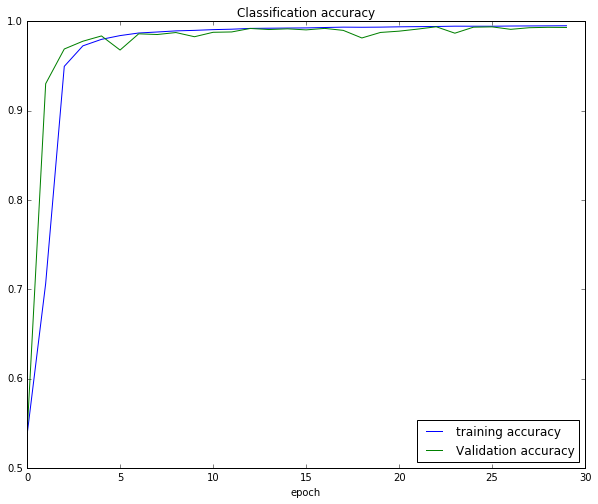

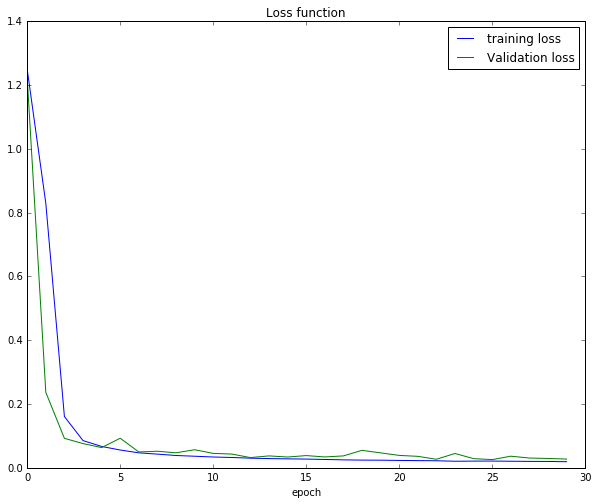

Classification accuracy = 0.993208551076
CPU times: user 11h 50min 14s, sys: 54min 32s, total: 12h 44min 47s
Wall time: 1h 55min 48s


2017-12-06 23:51:52.373753: I tensorflow/core/platform/cpu_feature_guard.cc:137] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA


In [2]:
%%time
from keras.models import Model, Sequential, load_model
from keras.layers import Input, Dense, Activation, Conv1D, MaxPooling1D, Dropout, Flatten, BatchNormalization, Embedding, LSTM

from keras.regularizers import l2
from keras.optimizers import SGD

model = Sequential()
model.add(Conv1D(16, kernel_size=16, activation="relu", input_shape=(len(train_data[0]),1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(32, 16, activation="relu"))
model.add(MaxPooling1D(pool_size=4))
model.add(Conv1D(64, 1, activation="relu"))
model.add(MaxPooling1D(pool_size=8))
# model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(256,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.2))
# model.add(Dense(32,activation="relu"))
# model.add(Dense(16,activation="relu"))
# model.add(Dense(8,activation="relu"))
# model.add(Dropout(0.2))
model.add(Dense(classes,activation="softmax"))
model.summary()
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adadelta(), metrics=['accuracy'])
history = model.fit(train_data, train_label, batch_size=200, epochs=30, verbose=1, validation_data=(test_data, test_label))
score = model.evaluate(test_data, test_label, verbose=0)
model.save("CNN_1-2.h5")

del train_data,train_label,test_data,test_label

print('Test loss:', score[0])
print('Test accuracy:', score[1])

print(history.history.keys())
plt.figure()
plt.title("Classification accuracy")
plt.xlabel("epoch")
plt.plot(history.history['acc'],label="training accuracy")
plt.plot(history.history['val_acc'],label="Validation accuracy")
plt.legend(loc=4)
plt.show()

plt.figure()
plt.title("Loss function")
plt.xlabel("epoch")
plt.plot(history.history['loss'],label="training loss")
plt.plot(history.history['val_loss'],label="Validation loss")
plt.legend()
plt.show()

print("Classification accuracy =",history.history['val_acc'][-1])

# Notes

alpha and ref, this need improvement_works to be done due to previously the technique i studied. for efficient separation I minus a STANDARD pulse shape where the difference between the two can be highlighted more.



41250/41259 [============================>.] - ETA: 0s

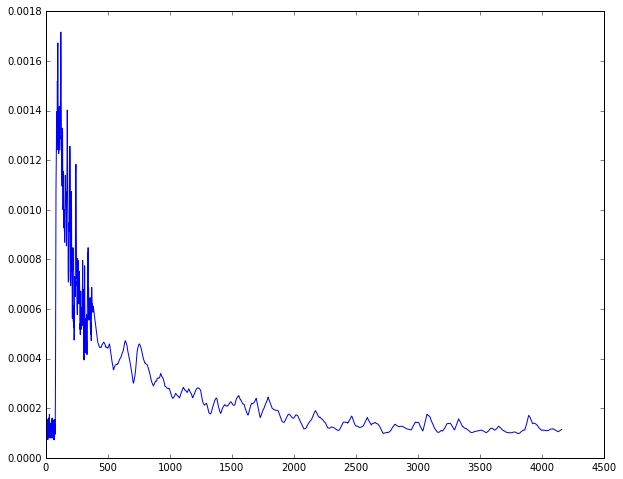

alpha, ref, piled, flat, 
 ls, ls+beta
[  7.68619776e-01   1.75052173e-05   9.51018665e-05   4.80179265e-02
   2.92750599e-04   1.82956949e-01]


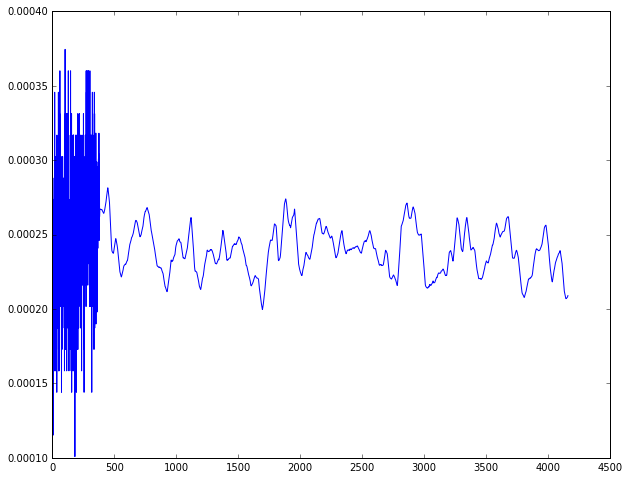

alpha, ref, piled, flat, 
 ls, ls+beta
[  8.66177143e-04   1.06149407e-07   2.56468520e-05   9.71057773e-01
   1.18003145e-03   2.68702544e-02]


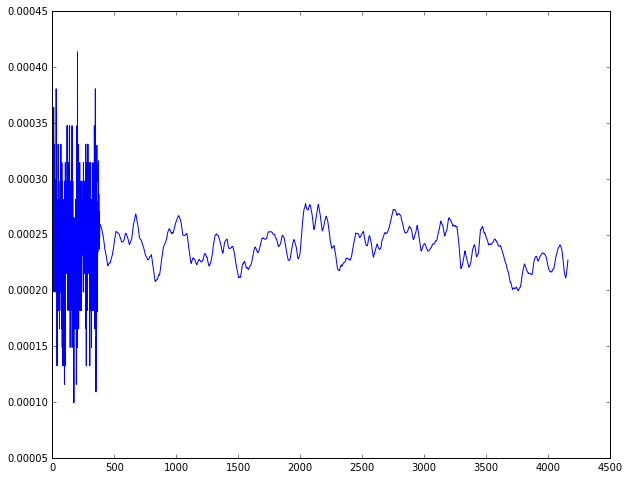

alpha, ref, piled, flat, 
 ls, ls+beta
[  9.09781607e-04   1.59505049e-07   3.41032428e-05   9.58452582e-01
   1.71233329e-03   3.88910845e-02]


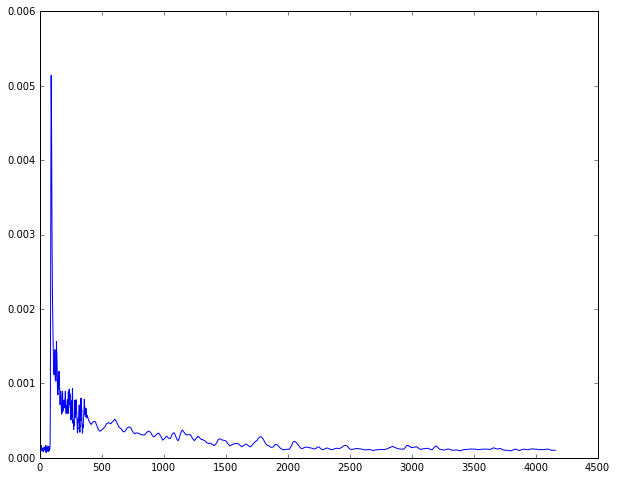

alpha, ref, piled, flat, 
 ls, ls+beta
[  2.40340270e-03   5.91001275e-08   5.44161594e-06   8.80737696e-03
   3.43038730e-04   9.88440752e-01]


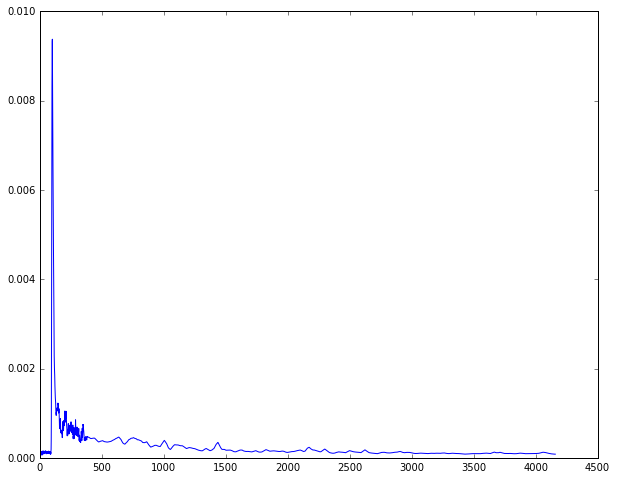

alpha, ref, piled, flat, 
 ls, ls+beta
[  9.93718207e-03   1.64012944e-12   7.08337466e-05   8.50211799e-01
   4.16279508e-05   1.39738575e-01]


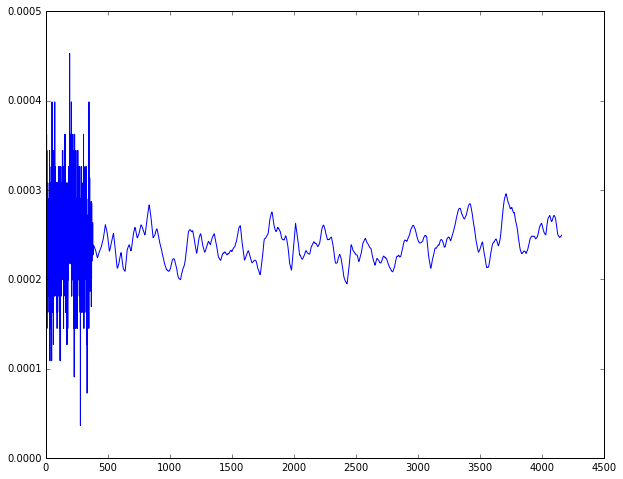

alpha, ref, piled, flat, 
 ls, ls+beta
[  8.95619101e-04   6.96155098e-08   1.79152939e-05   9.71794724e-01
   1.27802929e-03   2.60135680e-02]


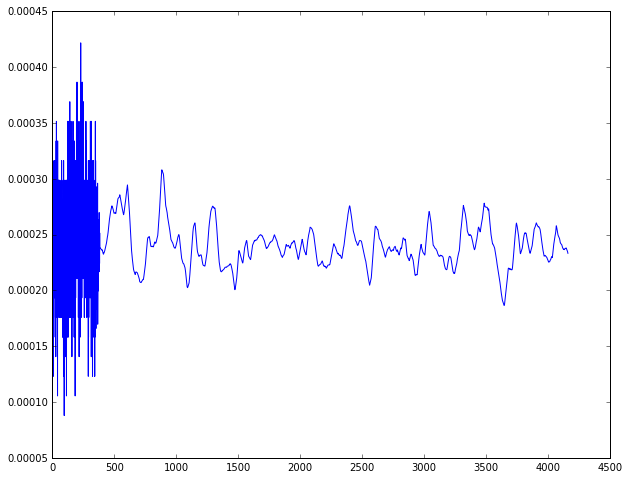

alpha, ref, piled, flat, 
 ls, ls+beta
[  7.07233732e-04   8.11341678e-08   2.32465827e-05   9.73184586e-01
   1.01558410e-03   2.50692219e-02]


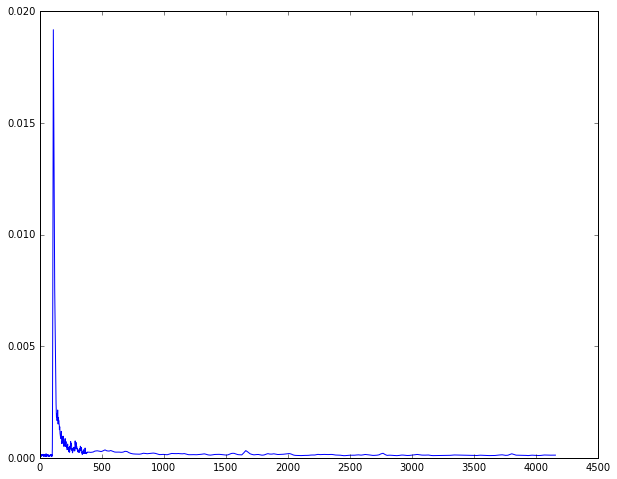

alpha, ref, piled, flat, 
 ls, ls+beta
[  2.41790549e-05   3.36966529e-28   8.43257681e-07   9.99938130e-01
   7.72991653e-12   3.68875772e-05]


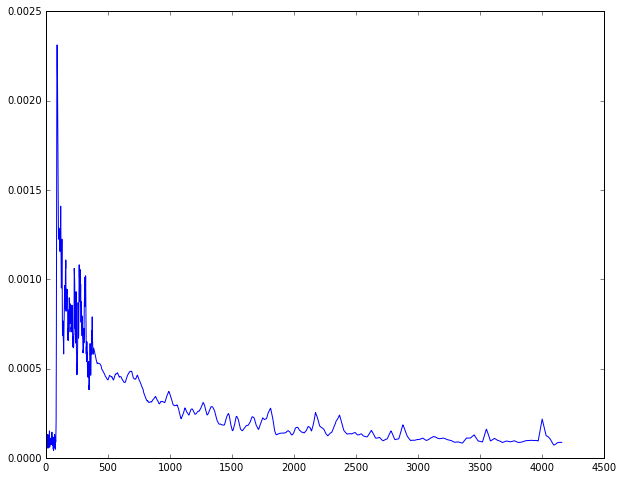

alpha, ref, piled, flat, 
 ls, ls+beta
[  2.62583885e-02   4.02014630e-05   6.88437576e-05   1.34178856e-02
   8.62211746e-04   9.59352493e-01]


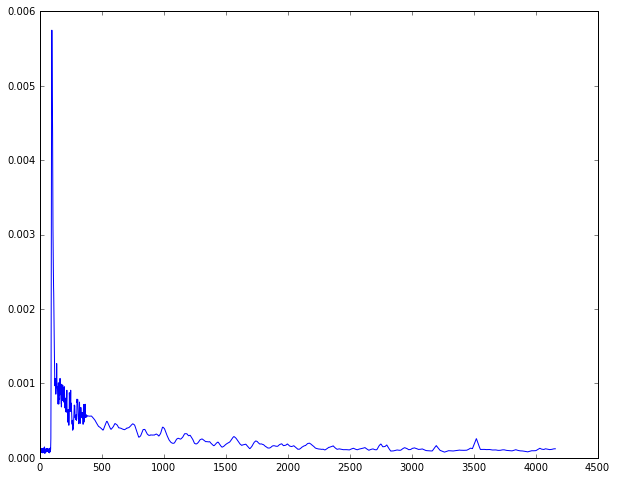

alpha, ref, piled, flat, 
 ls, ls+beta
[  1.70398760e-03   1.14420269e-08   1.14563918e-05   3.04486905e-03
   2.90301359e-05   9.95210588e-01]


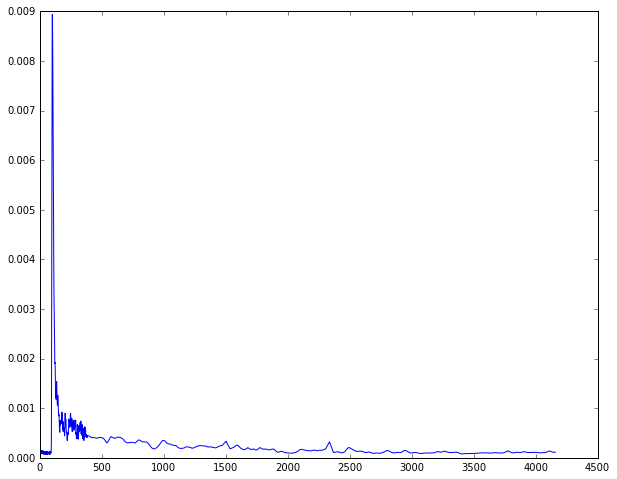

alpha, ref, piled, flat, 
 ls, ls+beta
[  7.63856294e-03   2.01822608e-12   6.92201793e-05   3.68506521e-01
   2.50100675e-05   6.23760760e-01]


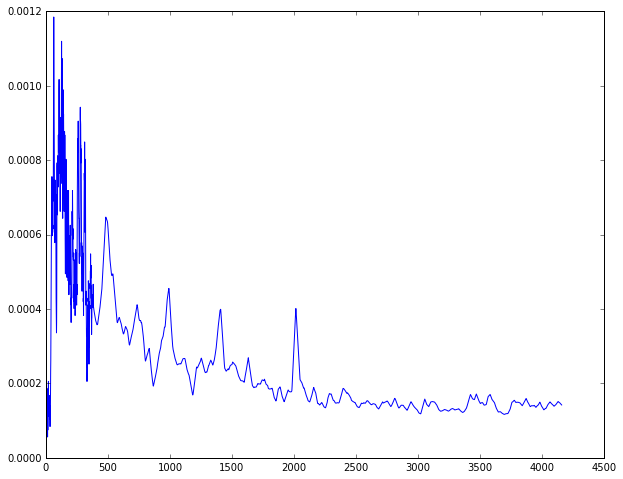

alpha, ref, piled, flat, 
 ls, ls+beta
[  1.02237929e-02   2.11345082e-06   4.00819517e-05   9.84933853e-01
   5.93039265e-04   4.20701550e-03]


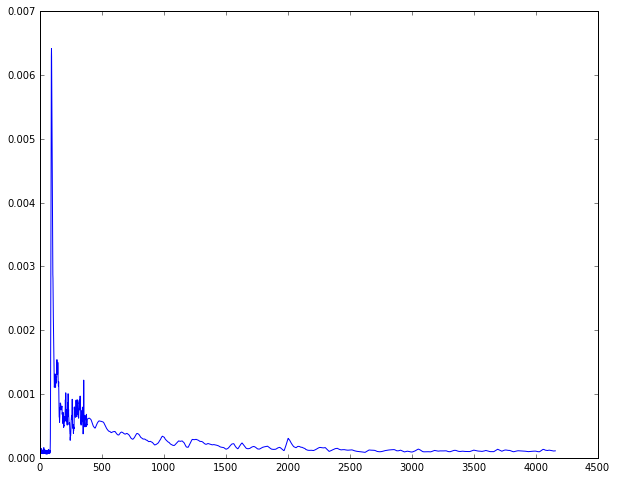

alpha, ref, piled, flat, 
 ls, ls+beta
[  3.35019976e-02   2.16026841e-08   1.06140622e-04   2.28178099e-01
   1.44510530e-03   7.36768663e-01]


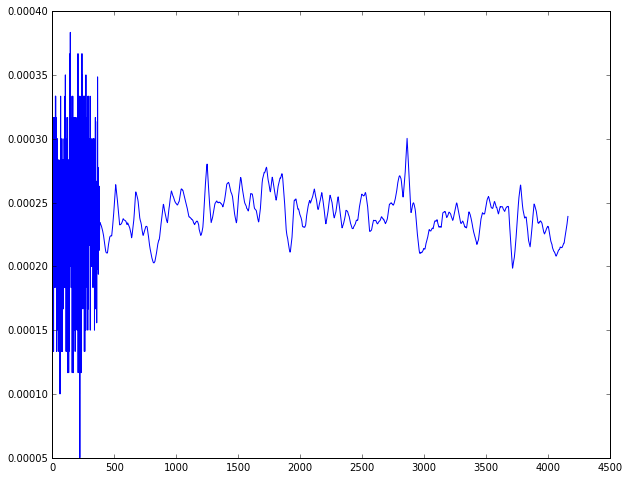

alpha, ref, piled, flat, 
 ls, ls+beta
[  8.84952431e-04   1.84970276e-07   3.74496121e-05   9.51077938e-01
   2.06451654e-03   4.59349044e-02]


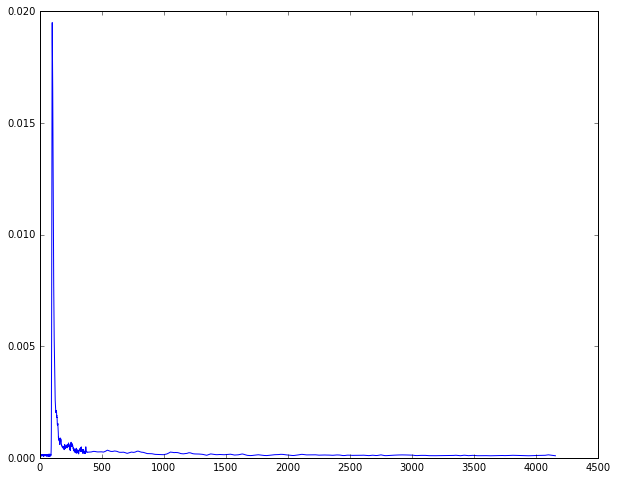

alpha, ref, piled, flat, 
 ls, ls+beta
[  6.34993512e-06   4.33161119e-26   1.82462012e-09   9.99991298e-01
   6.52043086e-10   2.37476252e-06]


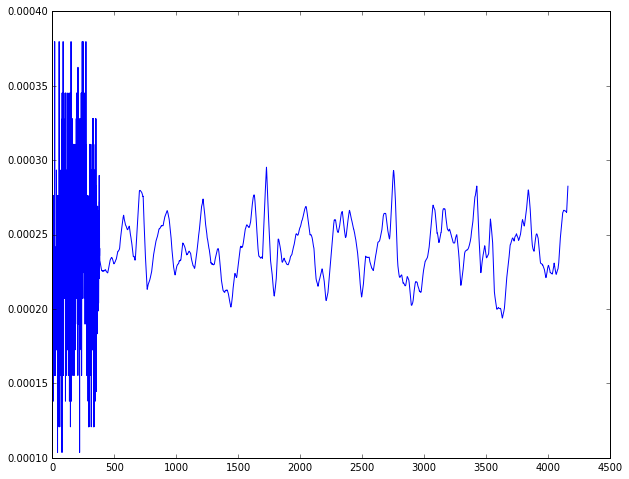

alpha, ref, piled, flat, 
 ls, ls+beta
[  1.05903926e-03   2.00854203e-07   3.32737036e-05   9.43205118e-01
   2.02224334e-03   5.36800213e-02]


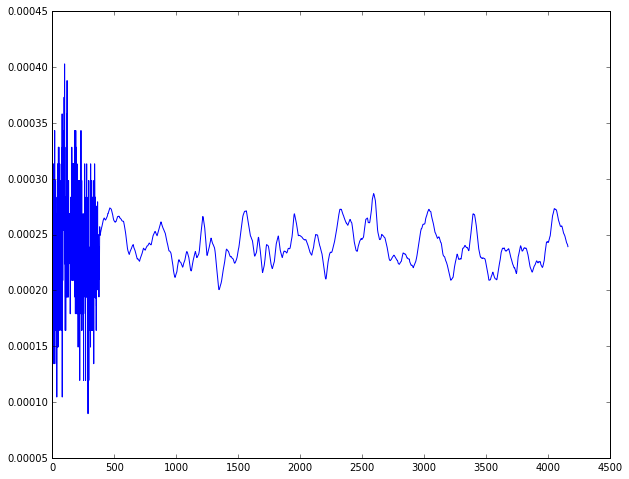

alpha, ref, piled, flat, 
 ls, ls+beta
[  1.02562876e-03   1.46967352e-07   2.81399207e-05   9.47053432e-01
   2.07091938e-03   4.98217382e-02]


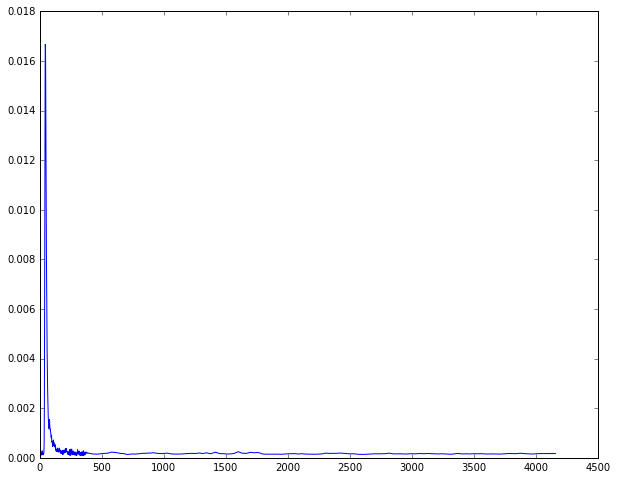

alpha, ref, piled, flat, 
 ls, ls+beta
[  5.06163772e-20   0.00000000e+00   1.26207421e-32   9.47156398e-09
   1.00000000e+00   1.18807525e-19]


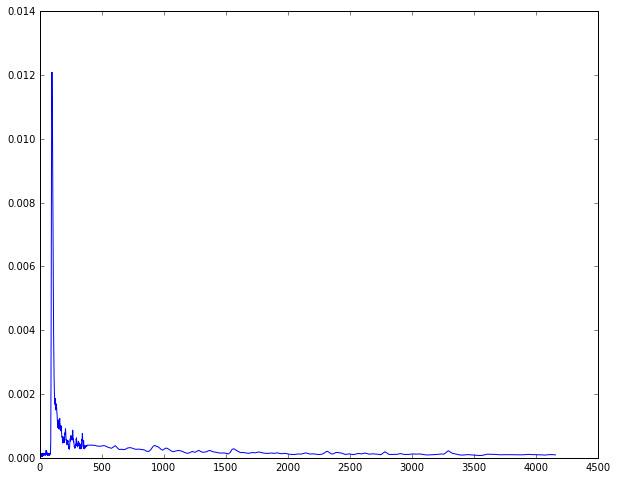

alpha, ref, piled, flat, 
 ls, ls+beta
[  6.29420974e-04   8.36083392e-17   1.51204219e-07   9.97752964e-01
   1.13368624e-05   1.60609384e-03]


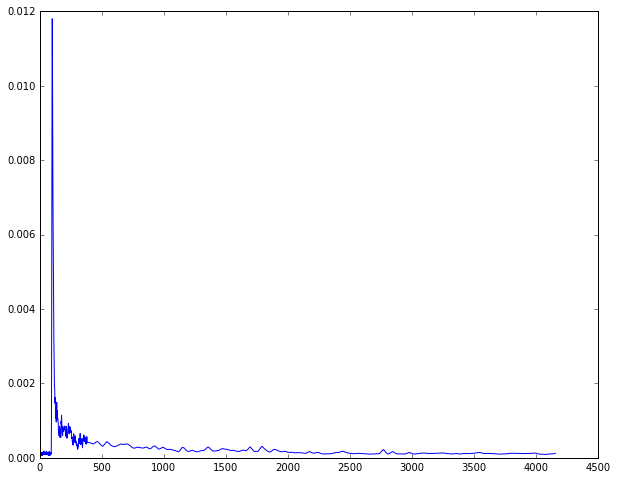

alpha, ref, piled, flat, 
 ls, ls+beta
[  4.43910388e-03   1.23369387e-13   1.15406028e-05   7.93497562e-01
   3.12967095e-05   2.02020451e-01]


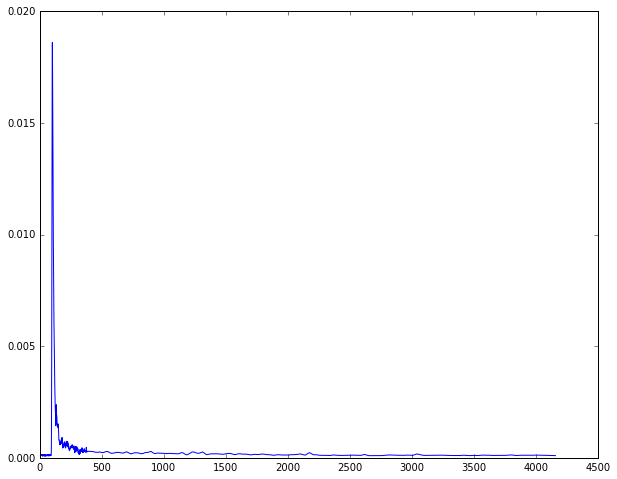

alpha, ref, piled, flat, 
 ls, ls+beta
[  1.30220478e-05   1.82474986e-24   8.97553409e-09   9.99968886e-01
   2.44716092e-09   1.81280102e-05]


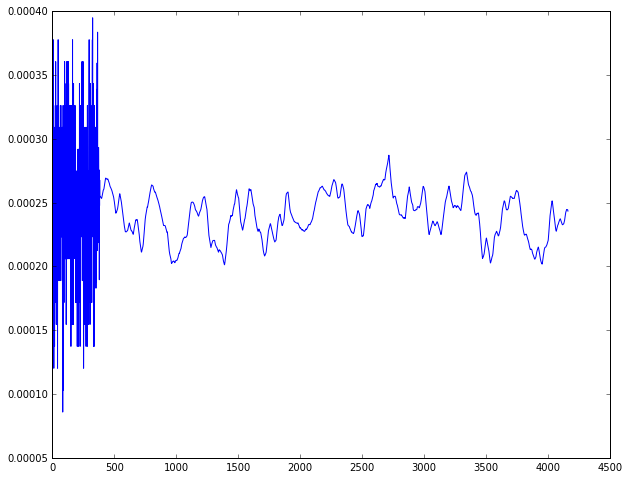

alpha, ref, piled, flat, 
 ls, ls+beta
[  9.17417230e-04   9.09541384e-08   2.34749405e-05   9.69267726e-01
   1.29223661e-03   2.84990538e-02]


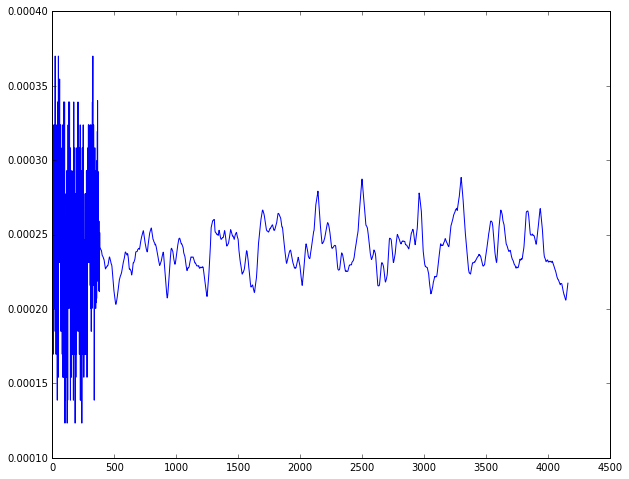

alpha, ref, piled, flat, 
 ls, ls+beta
[  7.48795399e-04   5.69400314e-08   1.65067977e-05   9.66965318e-01
   1.80990354e-03   3.04594431e-02]


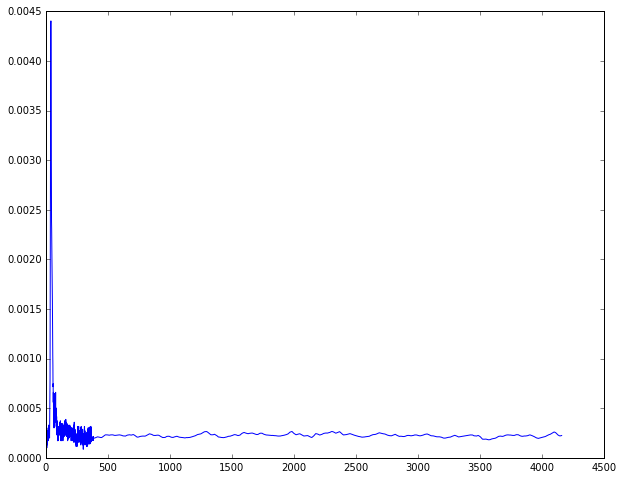

alpha, ref, piled, flat, 
 ls, ls+beta
[  6.33342410e-08   7.27948479e-16   1.26611948e-12   1.27980195e-03
   9.98710394e-01   9.76920001e-06]


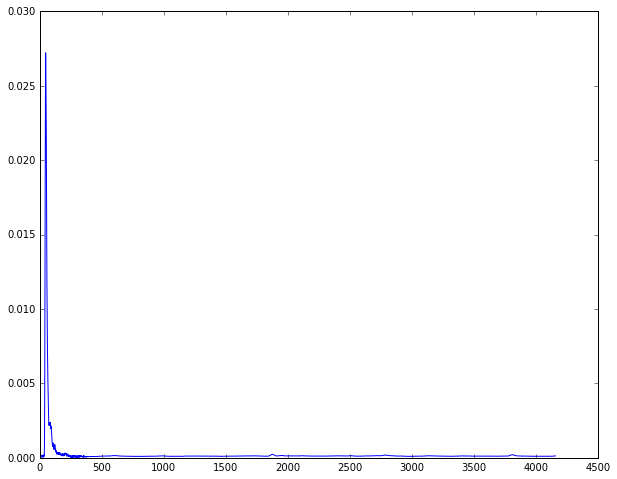

alpha, ref, piled, flat, 
 ls, ls+beta
[  8.43917393e-31   0.00000000e+00   0.00000000e+00   4.21774893e-13
   1.00000000e+00   1.43909235e-32]


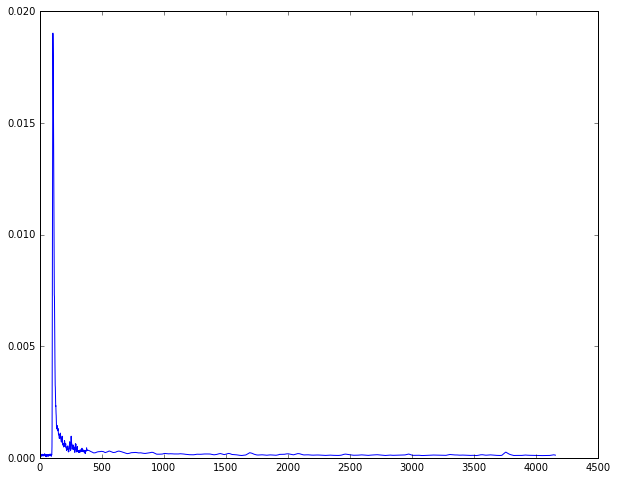

alpha, ref, piled, flat, 
 ls, ls+beta
[  6.12686972e-06   5.21532247e-28   4.95811889e-08   9.99965787e-01
   2.26660114e-11   2.80440745e-05]


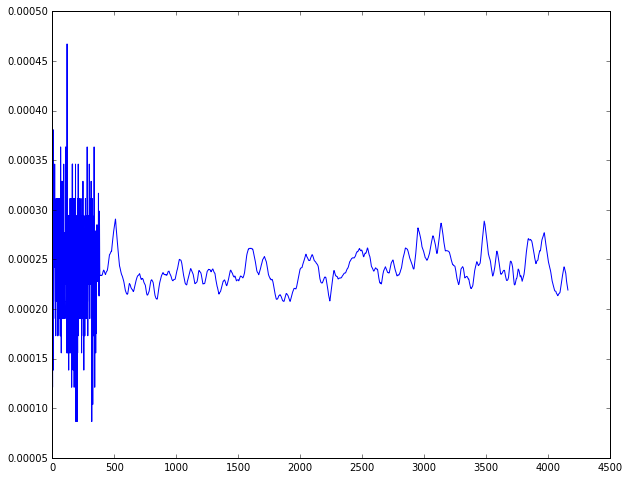

alpha, ref, piled, flat, 
 ls, ls+beta
[  8.94667348e-04   8.00013567e-08   1.96379151e-05   9.59704816e-01
   1.83211605e-03   3.75486538e-02]


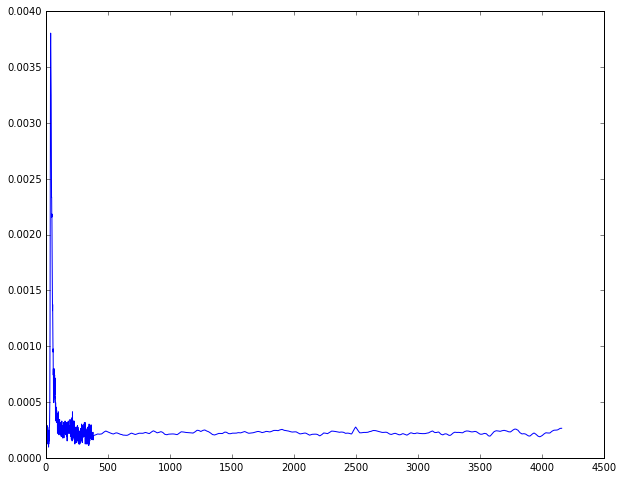

alpha, ref, piled, flat, 
 ls, ls+beta
[  7.57506982e-08   1.34687270e-15   2.01528377e-12   1.32063706e-03
   9.98664379e-01   1.48318049e-05]


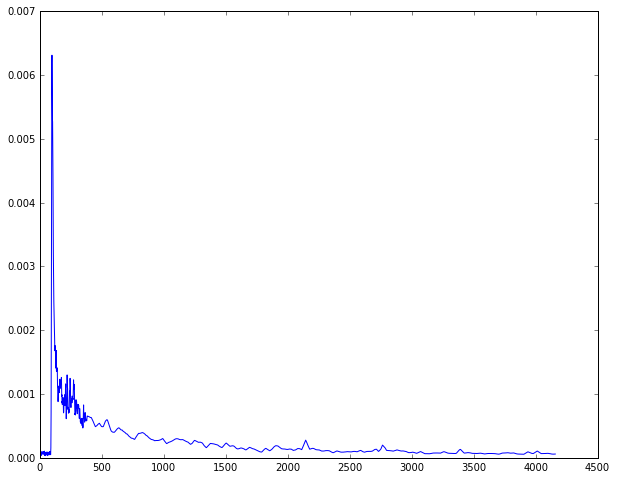

alpha, ref, piled, flat, 
 ls, ls+beta
[  2.71664560e-01   6.69585845e-08   5.05990395e-03   4.49453235e-01
   3.93532042e-04   2.73428679e-01]


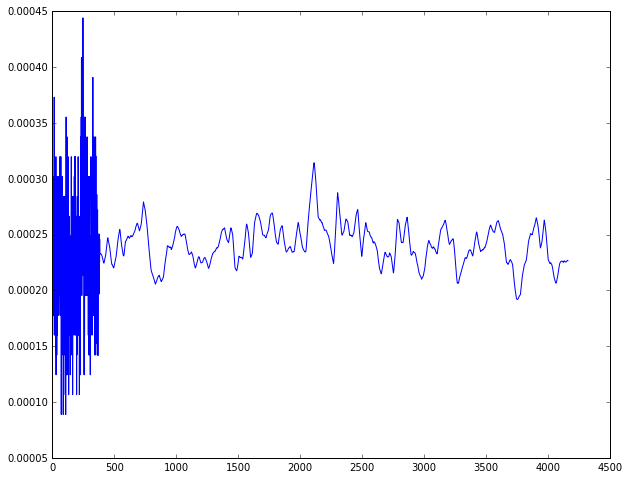

alpha, ref, piled, flat, 
 ls, ls+beta
[  7.06551014e-04   8.85634250e-08   2.47142507e-05   9.64317977e-01
   1.77357509e-03   3.31771001e-02]


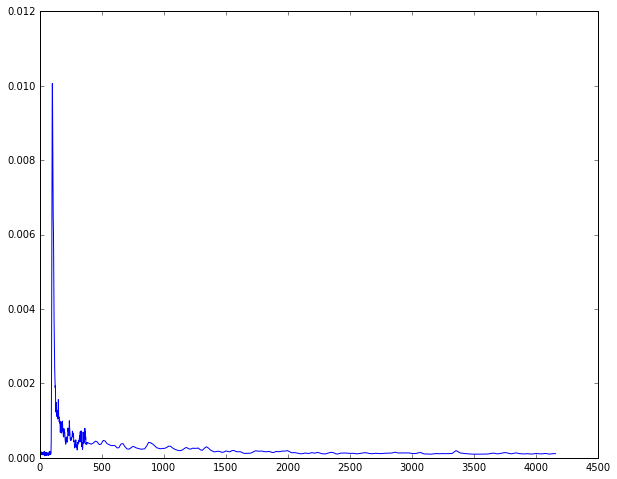

alpha, ref, piled, flat, 
 ls, ls+beta
[  5.13423979e-03   1.18901276e-14   7.70583756e-06   9.75818694e-01
   9.56830900e-06   1.90297496e-02]


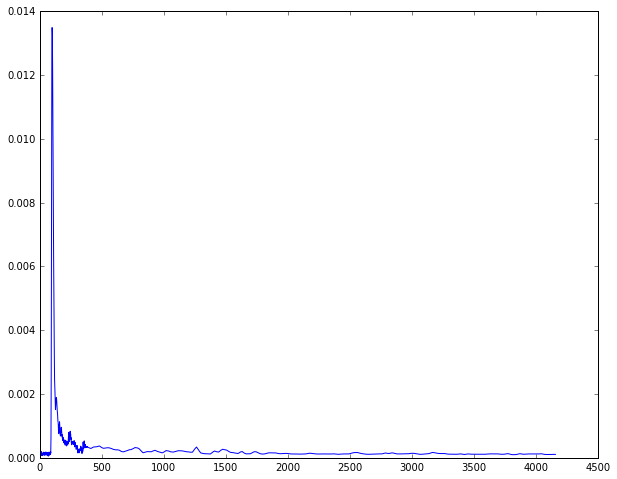

alpha, ref, piled, flat, 
 ls, ls+beta
[  1.60809577e-04   2.01957633e-20   1.35278526e-08   9.99711931e-01
   3.01070145e-07   1.26948697e-04]


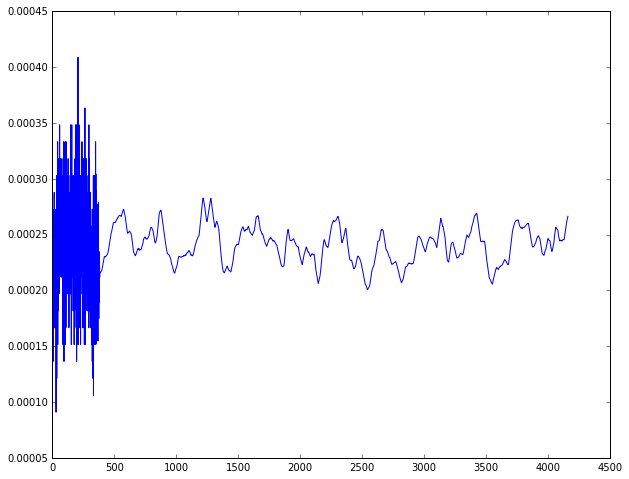

alpha, ref, piled, flat, 
 ls, ls+beta
[  9.70927940e-04   1.73192774e-07   3.18861203e-05   9.47205782e-01
   2.18302151e-03   4.96081449e-02]


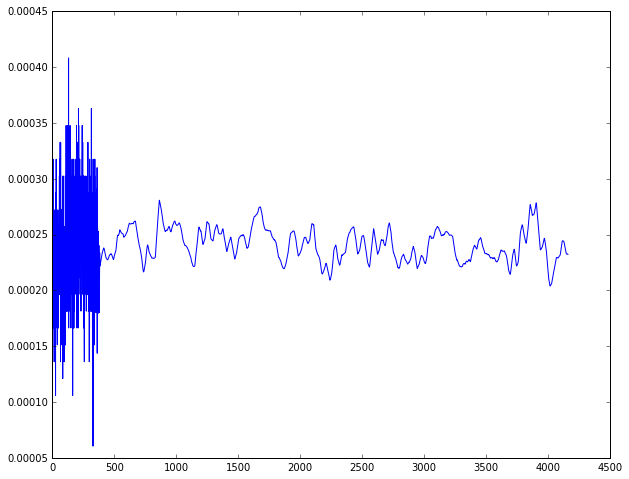

alpha, ref, piled, flat, 
 ls, ls+beta
[  8.87807633e-04   1.71460655e-07   3.46653869e-05   9.56009090e-01
   1.80845638e-03   4.12597694e-02]


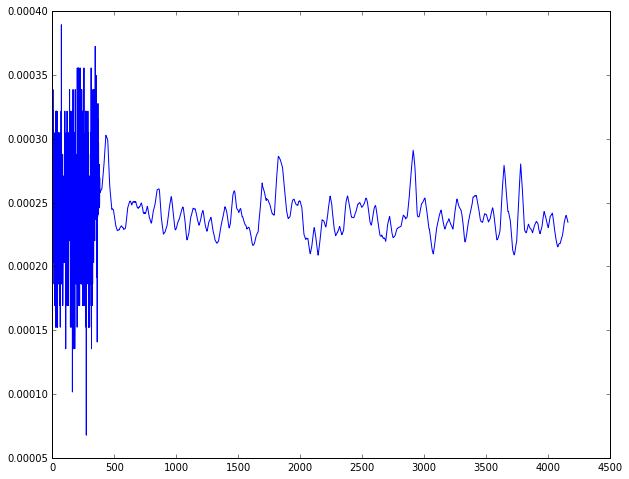

alpha, ref, piled, flat, 
 ls, ls+beta
[  9.10683244e-04   1.44718285e-07   3.16316036e-05   9.66983378e-01
   1.16745115e-03   3.09067052e-02]


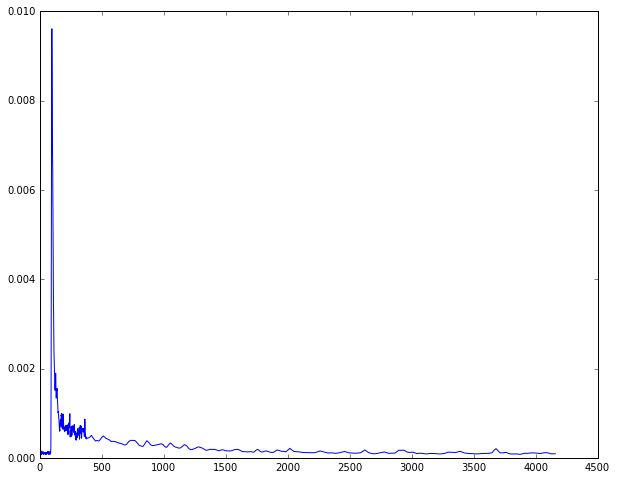

alpha, ref, piled, flat, 
 ls, ls+beta
[  1.35277454e-02   2.55599708e-12   1.29667797e-05   7.18034804e-01
   1.39419717e-04   2.68285125e-01]


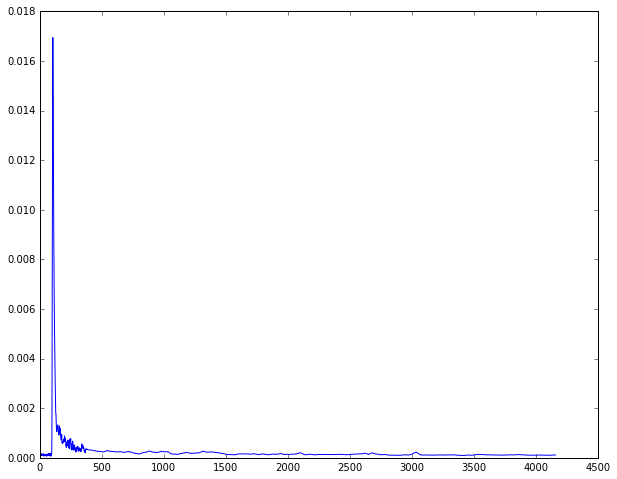

alpha, ref, piled, flat, 
 ls, ls+beta
[  3.43577849e-05   9.44626855e-24   2.74971313e-07   9.99675632e-01
   1.42460721e-09   2.89656862e-04]


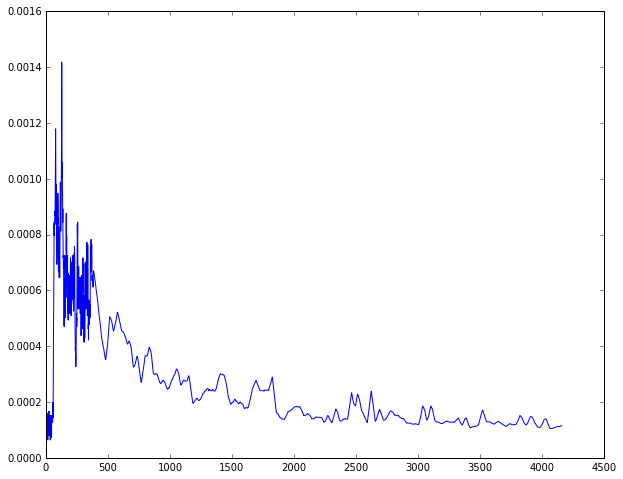

alpha, ref, piled, flat, 
 ls, ls+beta
[  1.55782938e-01   3.21504136e-04   2.47584219e-04   5.53340495e-01
   5.51571231e-03   2.84791708e-01]


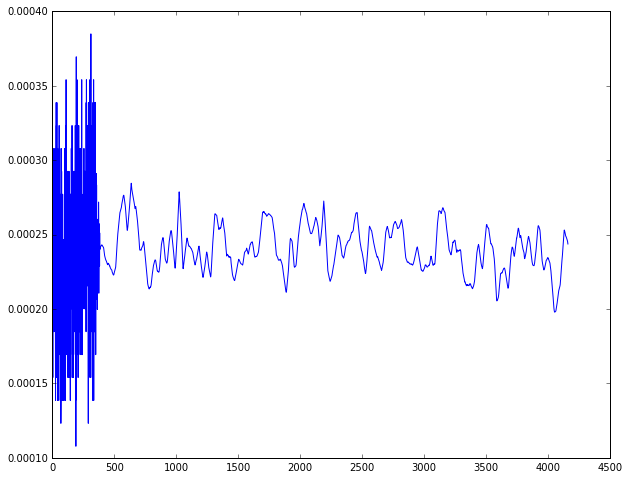

alpha, ref, piled, flat, 
 ls, ls+beta
[  8.79984698e-04   1.84905232e-07   3.77541764e-05   9.55012679e-01
   1.67488004e-03   4.23945189e-02]


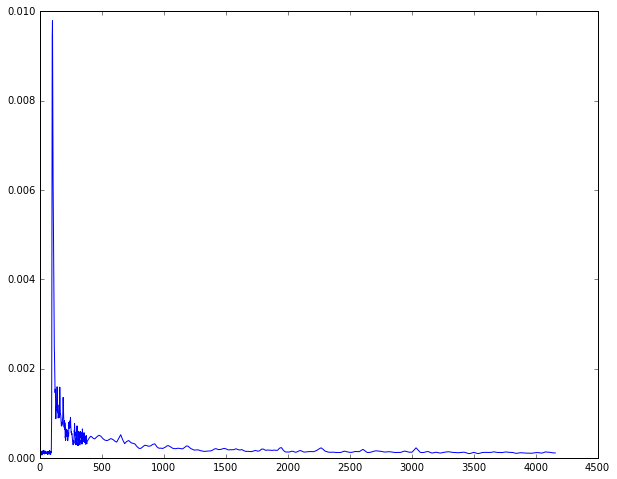

alpha, ref, piled, flat, 
 ls, ls+beta
[  1.17138056e-02   2.44542505e-13   4.64423283e-05   5.90812206e-01
   1.56409351e-05   3.97411942e-01]


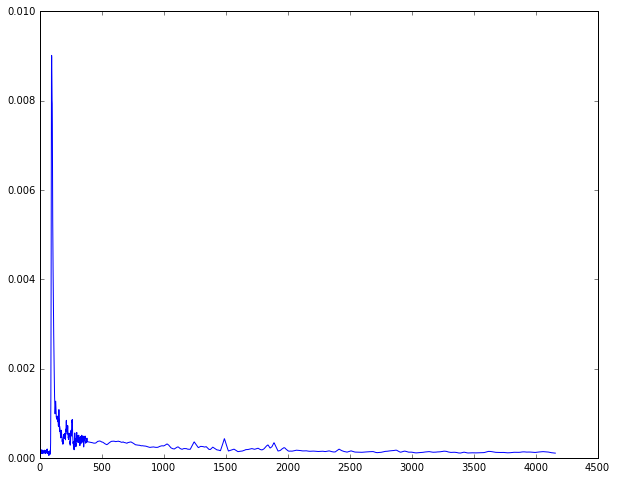

alpha, ref, piled, flat, 
 ls, ls+beta
[  2.21613143e-03   9.51395039e-12   5.61428715e-06   2.88219839e-01
   2.87481351e-04   7.09270954e-01]


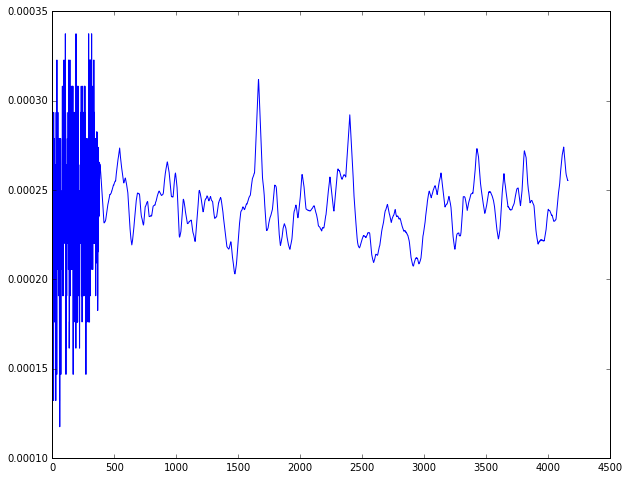

alpha, ref, piled, flat, 
 ls, ls+beta
[  9.99510637e-04   1.70978723e-07   3.16105652e-05   9.50298369e-01
   1.80542108e-03   4.68648672e-02]


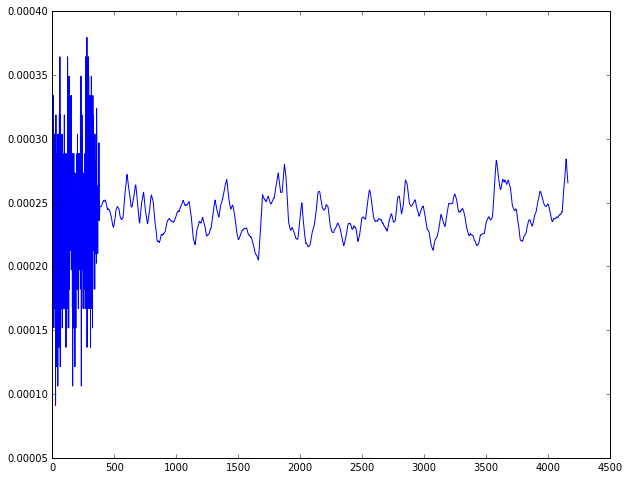

alpha, ref, piled, flat, 
 ls, ls+beta
[  7.95980624e-04   9.90435183e-08   2.51441525e-05   9.67174172e-01
   1.44906866e-03   3.05555388e-02]


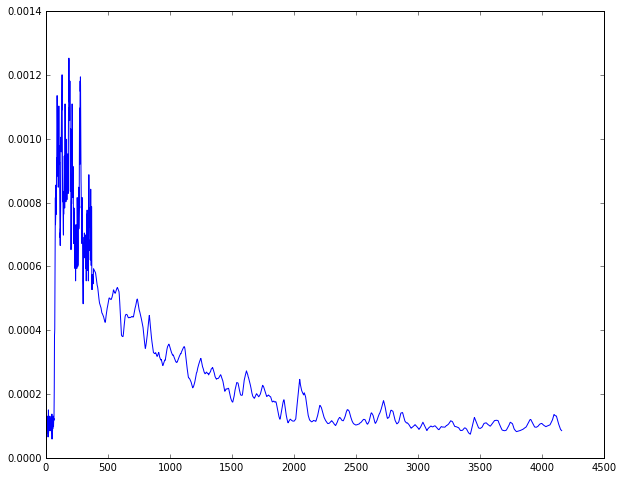

alpha, ref, piled, flat, 
 ls, ls+beta
[  4.41893786e-01   4.97023016e-03   1.31526904e-03   5.50245643e-01
   1.99341346e-04   1.37580954e-03]


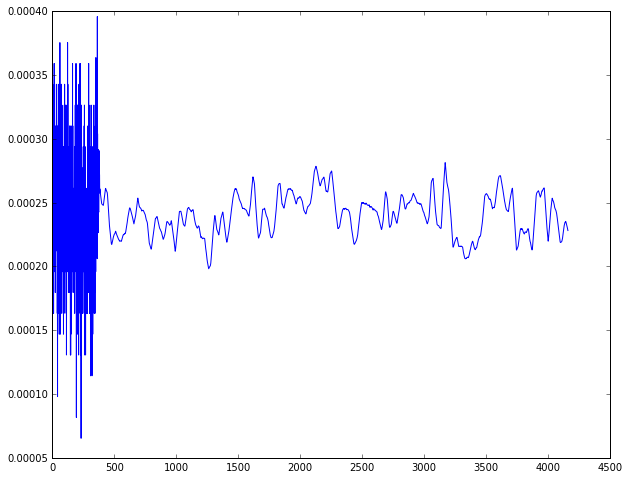

alpha, ref, piled, flat, 
 ls, ls+beta
[  8.41854489e-04   8.65709779e-08   2.21487117e-05   9.62664425e-01
   1.73877913e-03   3.47326808e-02]


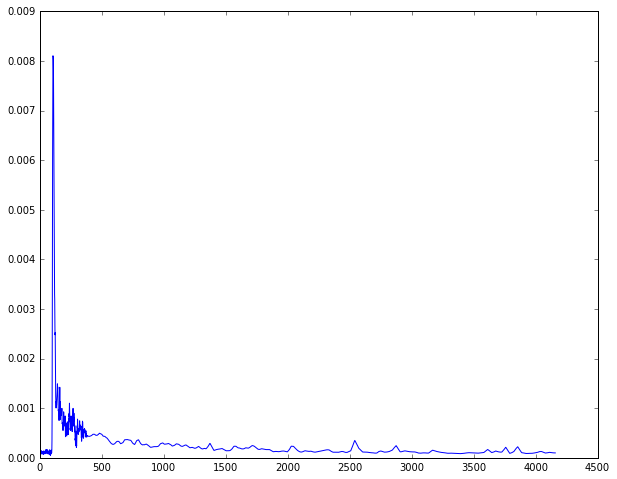

alpha, ref, piled, flat, 
 ls, ls+beta
[  8.85438547e-03   1.68123152e-13   1.53869521e-04   1.27841726e-01
   2.00145064e-06   8.63148034e-01]


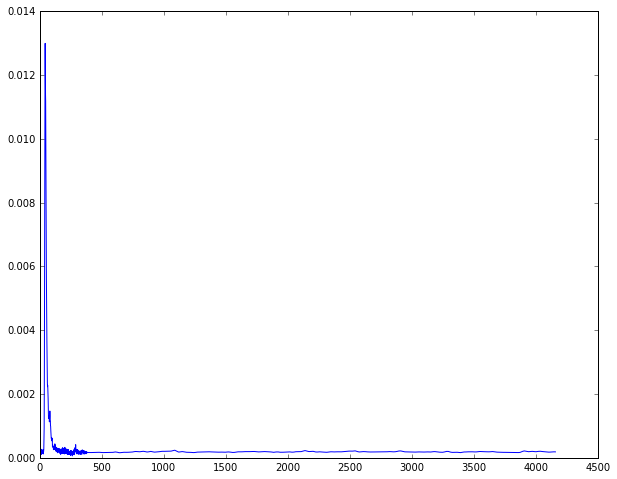

alpha, ref, piled, flat, 
 ls, ls+beta
[  2.46166992e-16   9.64222889e-35   1.13046487e-26   3.46383786e-07
   9.99999642e-01   1.34949681e-15]


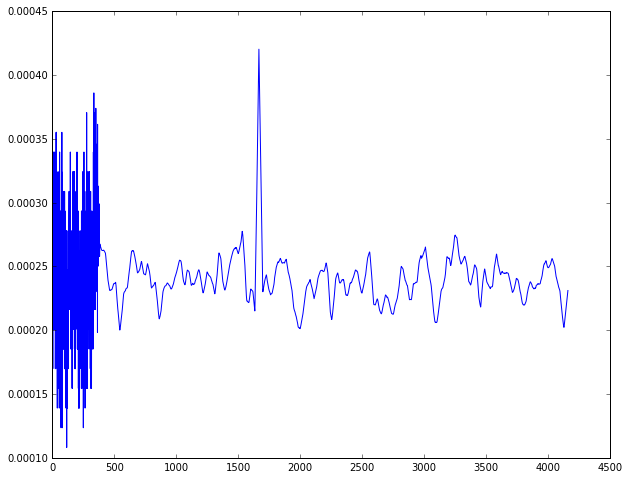

alpha, ref, piled, flat, 
 ls, ls+beta
[  7.15024595e-04   7.70634756e-08   2.14764150e-05   9.68389690e-01
   1.39052887e-03   2.94831600e-02]


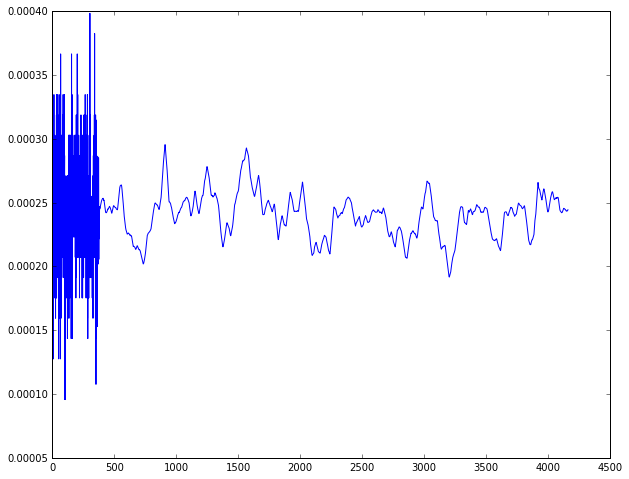

alpha, ref, piled, flat, 
 ls, ls+beta
[  8.00962618e-04   1.23662872e-07   2.75585062e-05   9.59952891e-01
   1.71949936e-03   3.74989659e-02]


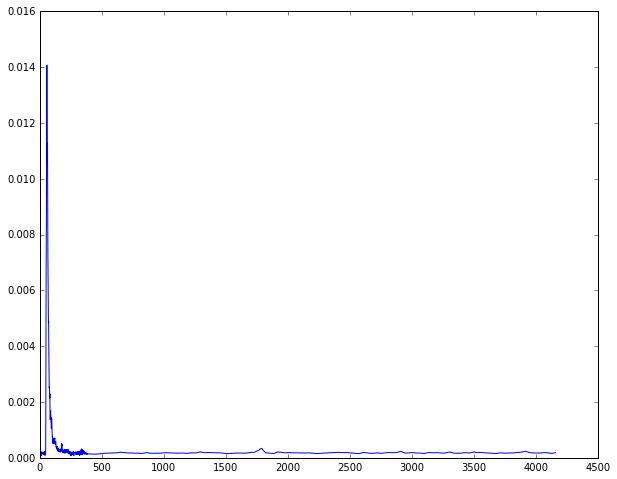

alpha, ref, piled, flat, 
 ls, ls+beta
[  2.70224368e-16   1.99325716e-36   1.05312979e-27   5.28340422e-07
   9.99999523e-01   1.83916039e-16]
CPU times: user 5min 2s, sys: 30.1 s, total: 5min 32s
Wall time: 1min 48s


In [8]:
%%time

from keras.models import load_model
model = load_model("CNN_1-2.h5")

PMTALL_pre_analysis = NORM(file_pre_analysis, tree, data)
PMTALL_pre_analysis = np.expand_dims(PMTALL_pre_analysis,axis=2)

pred = model.predict(PMTALL_pre_analysis,batch_size=50,verbose=1)
x = np.arange(0,len(PMTALL_pre_analysis[1]),1)

for i in range(50):
    k = np.random.randint(len(PMTALL_pre_analysis))
    plt.figure()
    plt.plot(x,PMTALL_pre_analysis[k])
    plt.show()
    print("alpha, ref, piled, flat, \n ls, ls+beta")
    print(pred[k])
    
del PMTALL_pre_analysis

# a second network is required!

for good separation between two similarly shaped waveform. from earlier studies, We found out that for effective separation of alpha and gamma events, we need a secondary network where the input is modified by subtracting a standard waveform, ie. an averaged reference pulse.



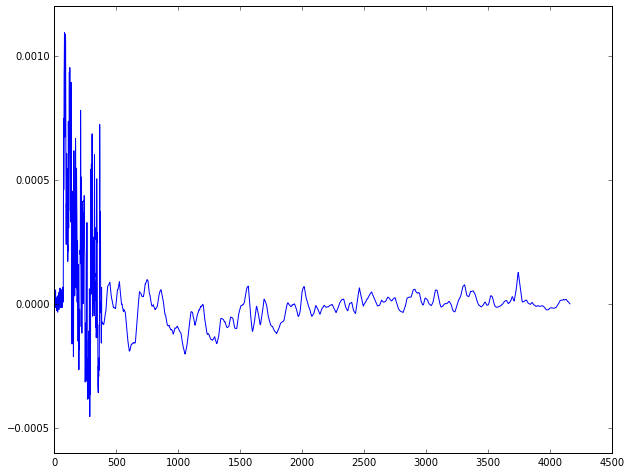

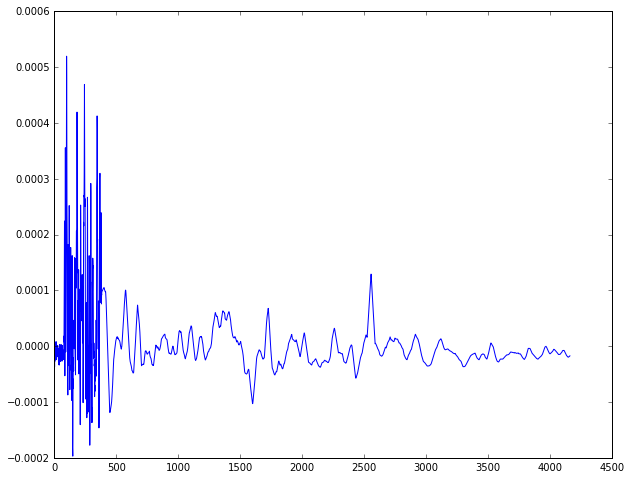

CPU times: user 15.8 s, sys: 6.17 s, total: 22 s
Wall time: 22.7 s


In [2]:
%%time

PMTALL_ref = NORM(file_ref, tree, data)
Standard = np.average(PMTALL_ref,axis=0)
PMTALL_alpha = NORM(file_alpha, tree, data)

alpha_2 = differ(PMTALL_alpha, Standard)
xp = np.arange(0,len(PMTALL_alpha[0]),1)
plt.figure()
plt.plot(xp,alpha_2[np.random.randint(len(alpha_2))])
plt.show()
del PMTALL_alpha

ref_2 = differ(PMTALL_ref, Standard)
plt.figure()
plt.plot(xp,ref_2[np.random.randint(len(ref_2))])
plt.show()
del PMTALL_ref

ratio=0.5
Alpha_2 = sep(alpha_2, ratio, 0)
Ref_2 =sep(ref_2, ratio, 1)
del alpha_2,ref_2

def data_sec(x1,x2,z):
    x11, x12, x13, x14 = x1
    x21, x22, x23, x24 = x2
    y1 = np.concatenate((x11, x21), axis=0)
    y2 = np.concatenate((x12, x22), axis=0)
    y3 = np.concatenate((x13, x23), axis=0)
    y4 = np.concatenate((x14, x24), axis=0)
    iy1 = np.expand_dims(y1, axis=2)
    iy2 = np.expand_dims(y2, axis=2)
    iy3 = keras.utils.to_categorical(y3, z)
    iy4 = keras.utils.to_categorical(y4, z)
    return iy1, iy2, iy3, iy4

train_data2, test_data2, train_label2, test_label2 = data_sec(Alpha_2, Ref_2, 2) 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 4033, 64)          8256      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 63, 64)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4032)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                258112    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 130       
Total params: 266,498
Trainable params: 266,498
Non-trainable params: 0
_________________________________________________________________
Trai

1793/1793 [==============================] - 11s - loss: 0.0612 - acc: 0.9877 - val_loss: 0.1185 - val_acc: 0.9532
Epoch 119/200
1793/1793 [==============================] - 11s - loss: 0.0602 - acc: 0.9849 - val_loss: 0.1027 - val_acc: 0.9677
Epoch 120/200
1793/1793 [==============================] - 12s - loss: 0.0585 - acc: 0.9872 - val_loss: 0.0991 - val_acc: 0.9682
Epoch 121/200
1793/1793 [==============================] - 11s - loss: 0.0587 - acc: 0.9894 - val_loss: 0.0966 - val_acc: 0.9743
Epoch 122/200
1793/1793 [==============================] - 11s - loss: 0.0583 - acc: 0.9900 - val_loss: 0.0994 - val_acc: 0.9677
Epoch 123/200
1793/1793 [==============================] - 12s - loss: 0.0543 - acc: 0.9894 - val_loss: 0.0981 - val_acc: 0.9665
Epoch 124/200
1793/1793 [==============================] - 12s - loss: 0.0550 - acc: 0.9894 - val_loss: 0.0973 - val_acc: 0.9682
Epoch 125/200
1793/1793 [==============================] - 12s - loss: 0.0541 - acc: 0.9900 - val_loss: 0.0989 

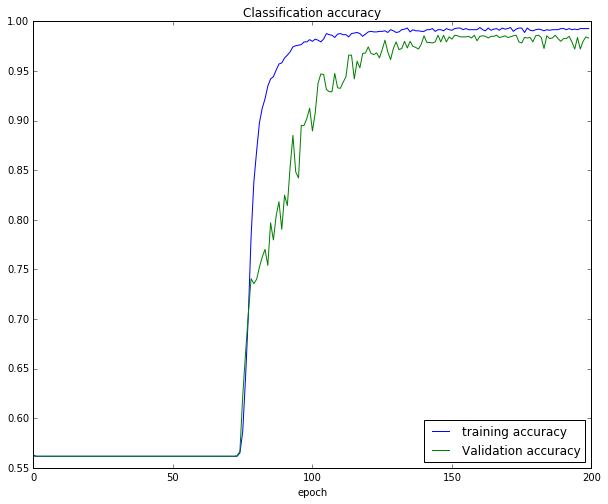

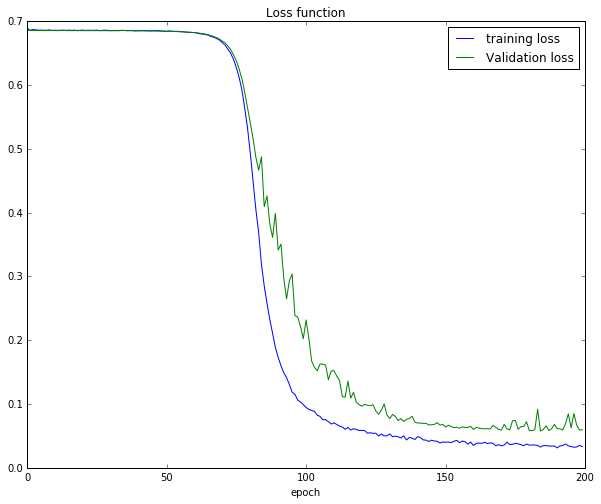

Classification accuracy = 0.983268264014
CPU times: user 3h 43min 52s, sys: 8min 14s, total: 3h 52min 6s
Wall time: 41min 6s


In [5]:
%%time

from keras.models import Model, Sequential, load_model
from keras.layers import Input, Dense, Activation, Conv1D, MaxPooling1D, Dropout, Flatten, BatchNormalization, LocallyConnected1D

from keras.regularizers import l2
from keras.optimizers import SGD

model_2 = Sequential()
model_2.add(Conv1D(64, kernel_size=128, activation="relu", input_shape=(len(train_data2[0]),1)))
model_2.add(MaxPooling1D(pool_size=64))
# model_2.add(Conv1D(4, 4, activation="relu"))
# model_2.add(MaxPooling1D(pool_size=4))
# model_2.add(Conv1D(8, 8, activation="relu"))
# model_2.add(MaxPooling1D(pool_size=8))
# model_2.add(LocallyConnected1D(4,2, activation="relu"))
# model_2.add(Dropout(0.2))
model_2.add(Flatten())
model_2.add(Dense(64,activation="relu"))
model_2.add(Dropout(0.2))
# model_2.add(Dense(64,activation="relu"))
# model_2.add(Dropout(0.2))
# model_2.add(Dense(64,activation="relu"))
# model_2.add(Dropout(0.2))
model_2.add(Dense(2,activation="softmax"))
model_2.summary()
model_2.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adadelta(), metrics=['accuracy'])
history_2 = model_2.fit(train_data2, train_label2, batch_size=50, epochs=200, verbose=1, validation_data=(test_data2, test_label2))
score_2 = model_2.evaluate(test_data2, test_label2, verbose=0)
model_2.save("CNN_2-2.h5")

del train_data2,train_label2,test_data2,test_label2

print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

print(history_2.history.keys())
plt.figure()
plt.title("Classification accuracy")
plt.xlabel("epoch")
plt.plot(history_2.history['acc'],label="training accuracy")
plt.plot(history_2.history['val_acc'],label="Validation accuracy")
plt.legend(loc=4)
plt.show()

plt.figure()
plt.title("Loss function")
plt.xlabel("epoch")
plt.plot(history_2.history['loss'],label="training loss")
plt.plot(history_2.history['val_loss'],label="Validation loss")
plt.legend()
plt.show()

print("Classification accuracy =",history_2.history['val_acc'][-1])


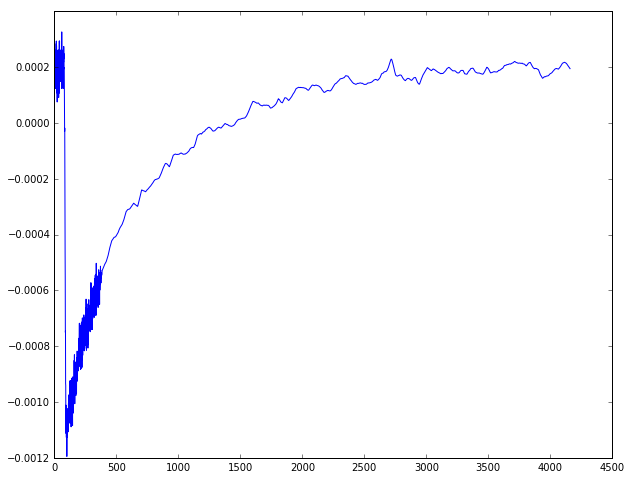

41250/41259 [============================>.] - ETA: 0s

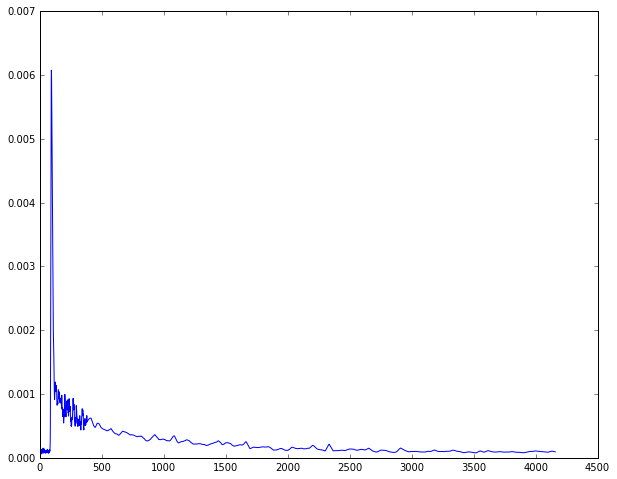

piled, flat, alpha, ls, 
 ls+beta, ref
[  4.25162492e-03   5.19847667e-08   5.16836481e-05   4.11599502e-02
   7.38622912e-04   9.53798056e-01]
alpha, Ref
[  9.99981761e-01   1.81868763e-05]


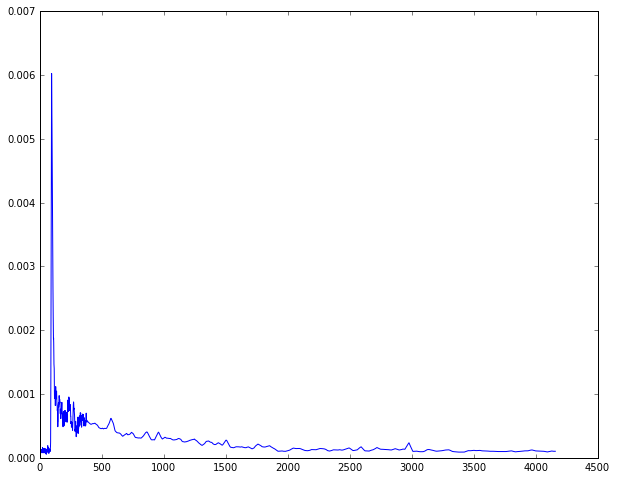

piled, flat, alpha, ls, 
 ls+beta, ref
[  1.60704076e-03   4.44685888e-08   2.17110592e-05   7.09455367e-03
   1.11084482e-04   9.91165578e-01]
alpha, Ref
[  9.99937534e-01   6.24824170e-05]


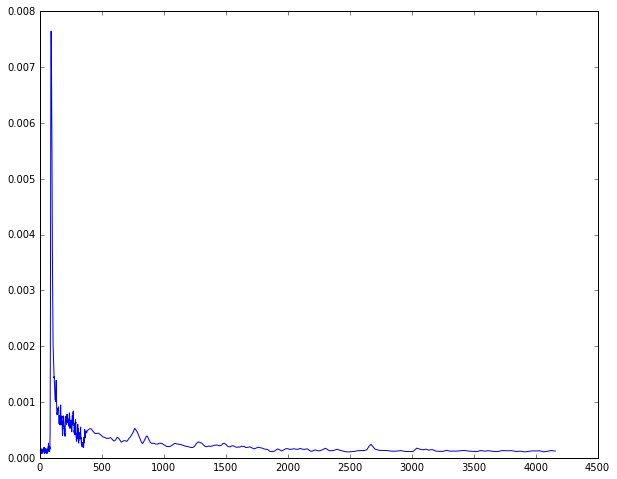

piled, flat, alpha, ls, 
 ls+beta, ref
[  3.23851197e-03   1.98219455e-10   3.06702532e-06   4.18272853e-01
   6.31129649e-03   5.72174311e-01]
alpha, Ref
[  9.99998808e-01   1.13292424e-06]


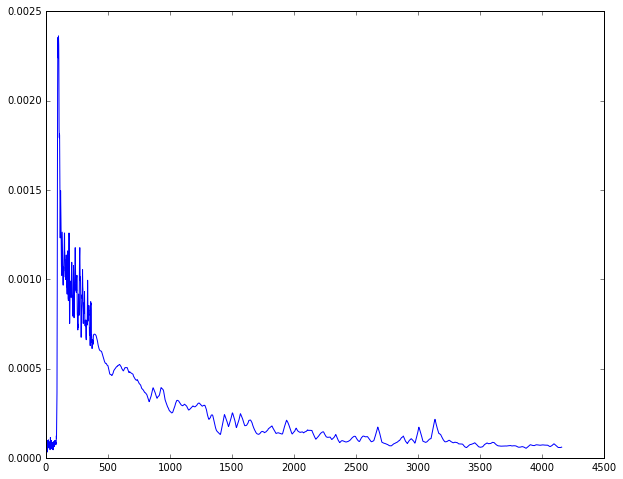

piled, flat, alpha, ls, 
 ls+beta, ref
[  3.95663828e-02   1.60940195e-04   9.55984287e-04   1.00030731e-02
   3.40248778e-04   9.48973298e-01]
alpha, Ref
[ 0.99501771  0.00498235]


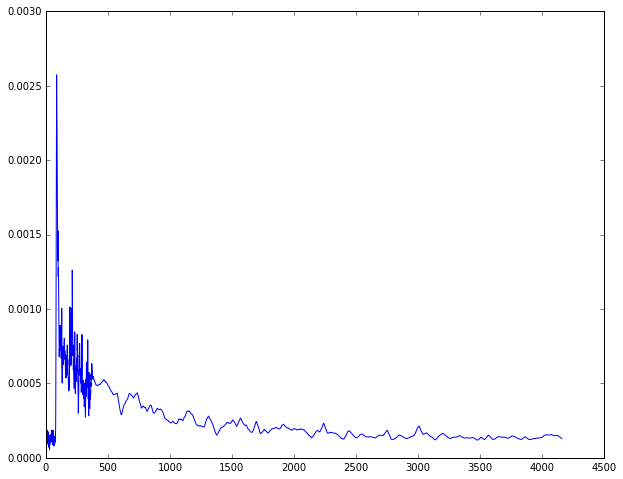

piled, flat, alpha, ls, 
 ls+beta, ref
[  2.57148151e-03   1.50757035e-06   3.63060008e-06   1.84175081e-03
   1.93463304e-04   9.95388150e-01]
alpha, Ref
[ 0.99638122  0.00361881]


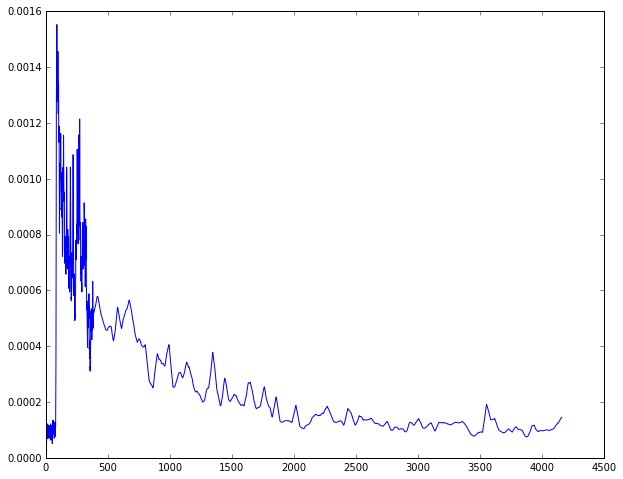

piled, flat, alpha, ls, 
 ls+beta, ref
[  2.54774932e-02   8.24372109e-04   1.48209758e-04   1.41461333e-02
   9.56866308e-04   9.58446860e-01]
alpha, Ref
[ 0.96140063  0.03859932]


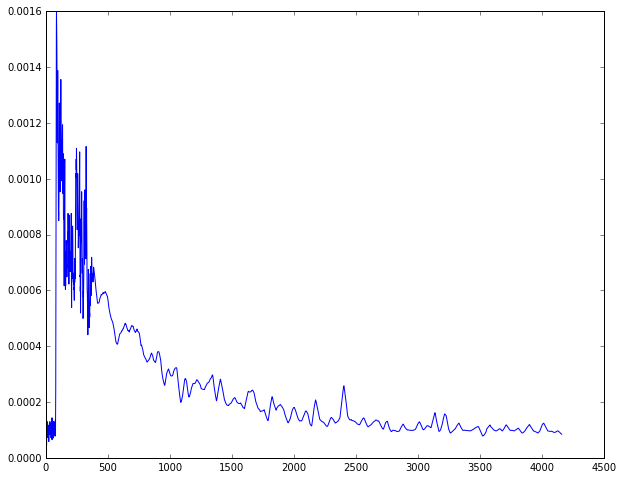

piled, flat, alpha, ls, 
 ls+beta, ref
[  1.50187969e-01   3.49529274e-03   4.01460828e-04   4.94848527e-02
   1.48594857e-03   7.94944465e-01]
alpha, Ref
[ 0.98900807  0.01099193]


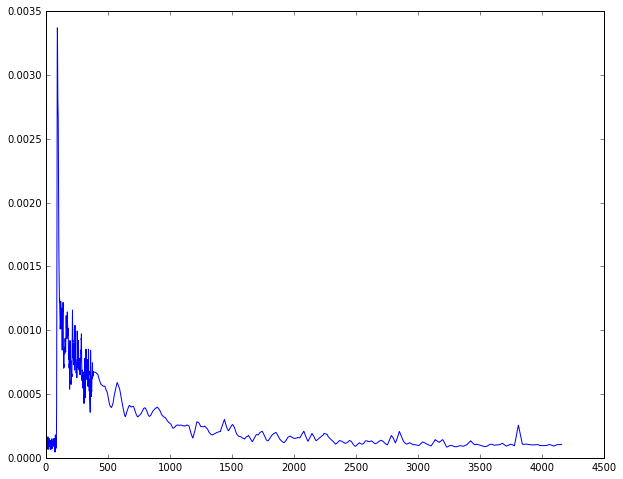

piled, flat, alpha, ls, 
 ls+beta, ref
[  9.14127938e-03   3.07679738e-06   3.40207371e-05   8.99102632e-03
   4.94437816e-04   9.81336057e-01]
alpha, Ref
[ 0.99806231  0.00193772]


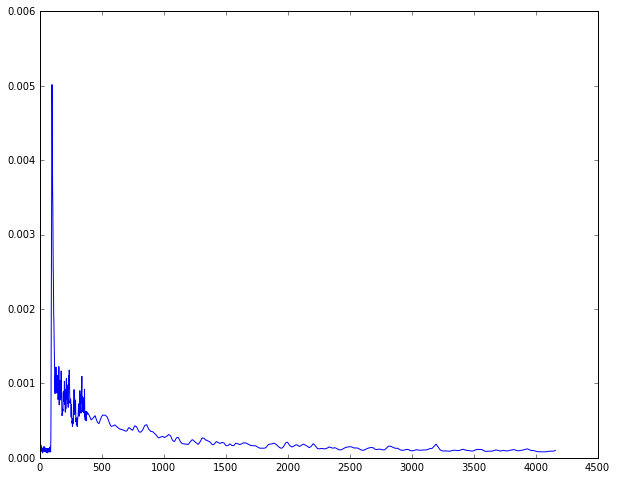

piled, flat, alpha, ls, 
 ls+beta, ref
[  2.64478698e-02   2.30538774e-07   1.68225553e-04   2.28344090e-02
   2.02510055e-04   9.50346708e-01]
alpha, Ref
[  9.99836802e-01   1.63160570e-04]


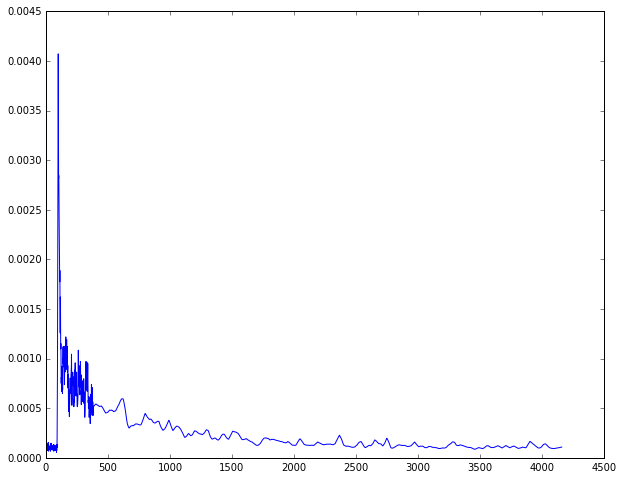

piled, flat, alpha, ls, 
 ls+beta, ref
[  1.45337544e-02   1.08311201e-06   5.76402854e-05   5.21518849e-03
   1.09363682e-04   9.80083048e-01]
alpha, Ref
[ 0.99815482  0.00184521]


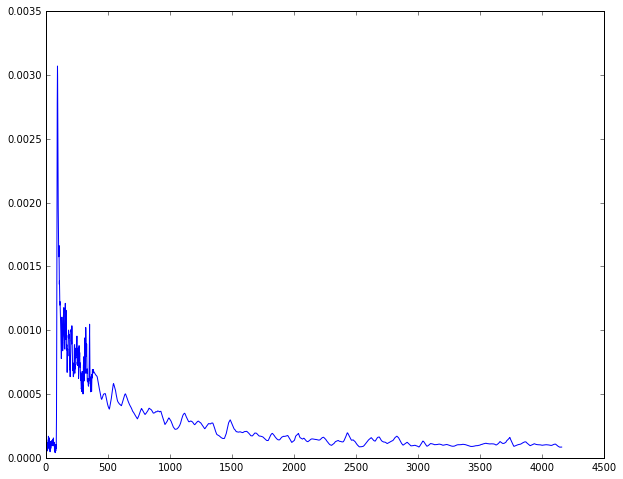

piled, flat, alpha, ls, 
 ls+beta, ref
[  7.74833700e-03   1.09635894e-05   4.50512707e-05   6.51461259e-03
   4.46317106e-04   9.85234737e-01]
alpha, Ref
[ 0.99648476  0.00351529]


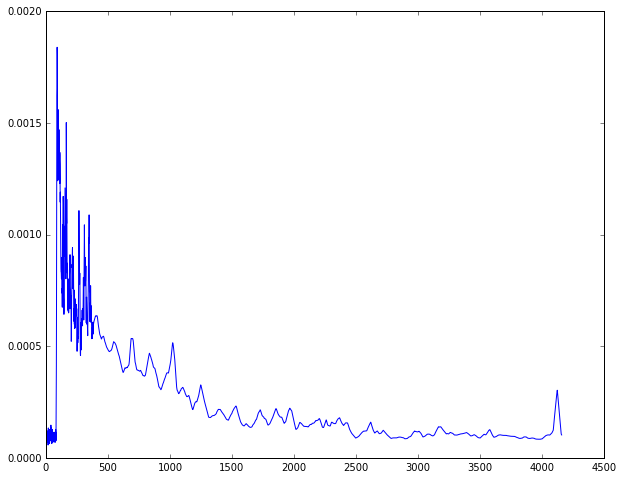

piled, flat, alpha, ls, 
 ls+beta, ref
[  1.66614175e-01   9.15059238e-04   3.80876561e-04   3.47143151e-02
   9.47854773e-04   7.96427667e-01]
alpha, Ref
[ 0.89479065  0.10520935]


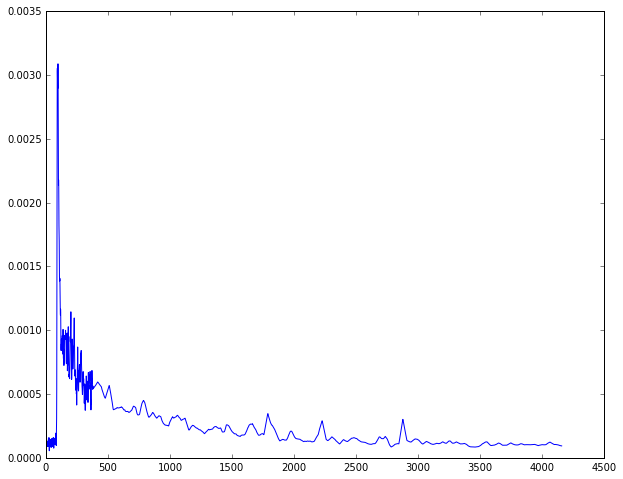

piled, flat, alpha, ls, 
 ls+beta, ref
[  1.61738100e-03   1.45221588e-06   9.66688458e-06   1.61700463e-03
   1.19184966e-04   9.96635377e-01]
alpha, Ref
[ 0.99793822  0.0020617 ]


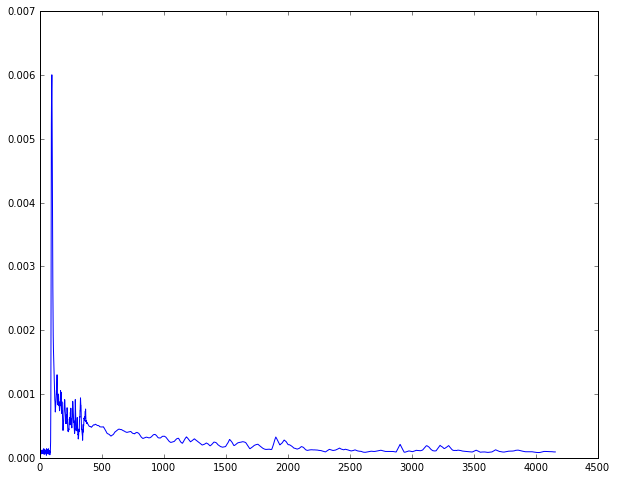

piled, flat, alpha, ls, 
 ls+beta, ref
[  9.41430451e-04   2.99558813e-08   1.12052467e-05   2.43572146e-03
   3.37536003e-05   9.96577919e-01]
alpha, Ref
[  9.99916315e-01   8.36875843e-05]


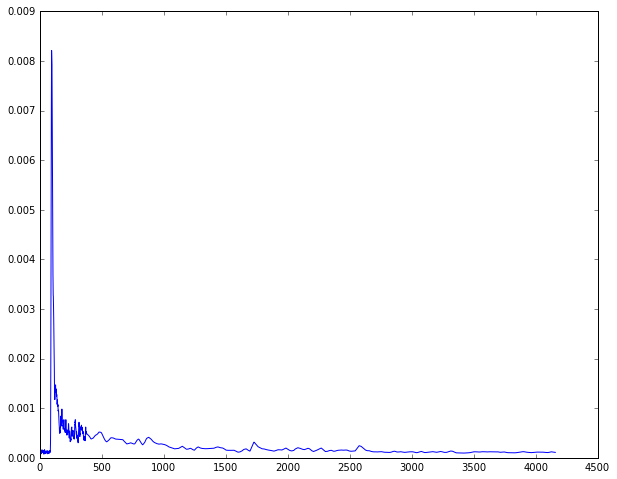

piled, flat, alpha, ls, 
 ls+beta, ref
[  3.39443865e-03   3.39386678e-11   4.59839475e-06   1.31558329e-01
   2.43302275e-04   8.64799321e-01]
alpha, Ref
[  9.99999762e-01   2.49486391e-07]


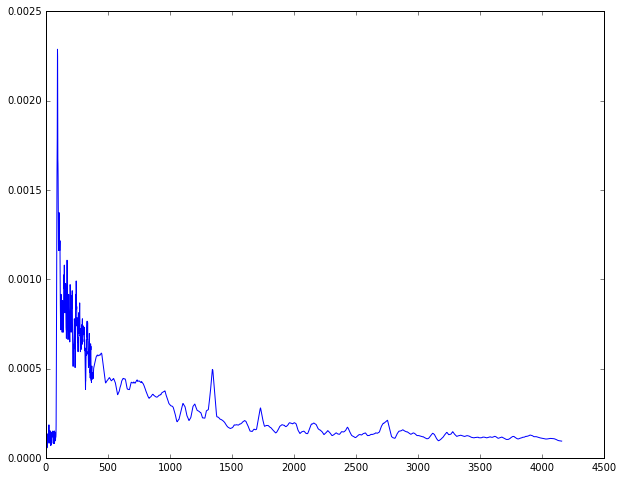

piled, flat, alpha, ls, 
 ls+beta, ref
[  2.94300891e-03   1.14765753e-05   1.02038375e-05   1.16292248e-03
   1.22724465e-04   9.95749593e-01]
alpha, Ref
[ 0.99164647  0.00835356]


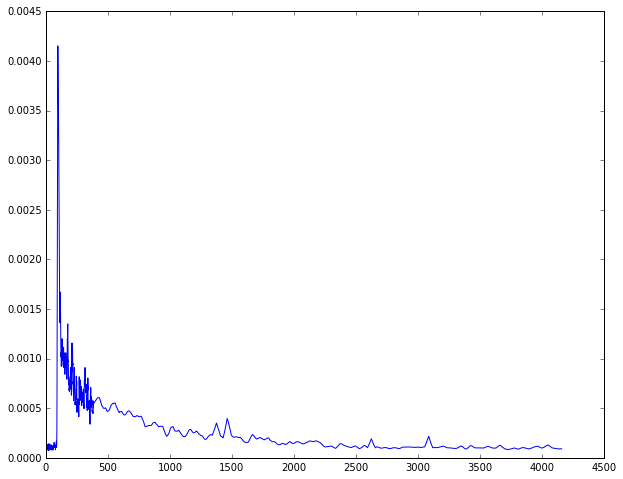

piled, flat, alpha, ls, 
 ls+beta, ref
[  6.10099966e-03   7.79836739e-07   4.59613002e-05   6.52393233e-03
   2.00278562e-04   9.87128019e-01]
alpha, Ref
[  9.99491215e-01   5.08719357e-04]


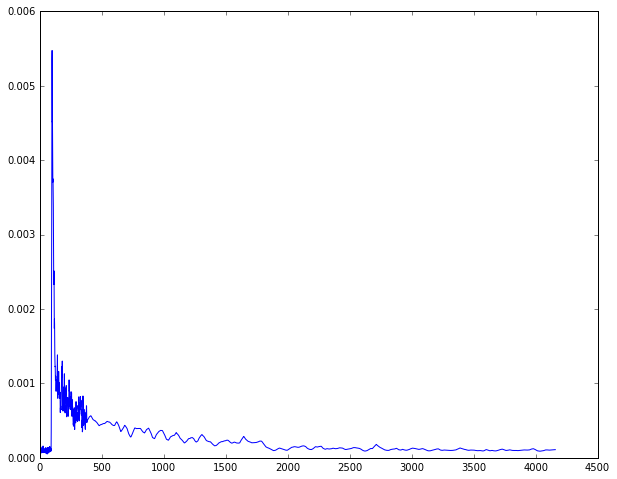

piled, flat, alpha, ls, 
 ls+beta, ref
[  6.02608547e-03   2.70111560e-08   5.32170488e-05   5.13931736e-03
   3.43772736e-05   9.88746941e-01]
alpha, Ref
[  9.99917984e-01   8.19611232e-05]


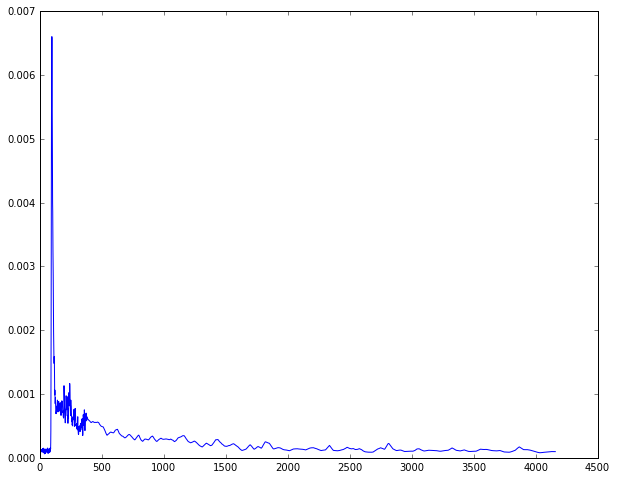

piled, flat, alpha, ls, 
 ls+beta, ref
[  2.02767388e-03   8.11325052e-09   1.59784977e-05   7.20319105e-03
   6.21558138e-05   9.90691066e-01]
alpha, Ref
[  9.99969006e-01   3.09952047e-05]


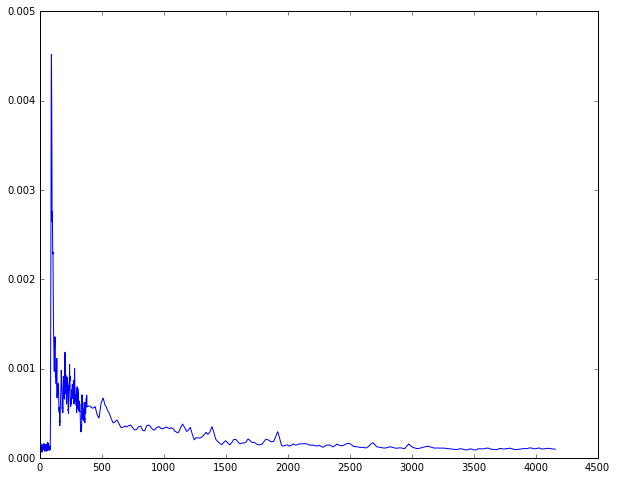

piled, flat, alpha, ls, 
 ls+beta, ref
[  1.37392955e-03   2.26459701e-06   4.59298280e-05   3.31742549e-03
   1.84575445e-04   9.95075881e-01]
alpha, Ref
[  9.99204814e-01   7.95153494e-04]
CPU times: user 8min 9s, sys: 36.3 s, total: 8min 45s
Wall time: 2min 25s


In [12]:
%%time
PMTALL_pre_analysis = NORM(file_pre_analysis, tree, data)

pre_2 = differ(PMTALL_pre_analysis, Standard)
plt.figure()
plt.plot(xp,pre_2[np.random.randint(len(pre_2))])
plt.show()

pre_2 = np.expand_dims(pre_2,axis=2)

indices = np.argmax(pred,axis=1)

model_2 = load_model("CNN_2-2.h5")
pred_2 = model_2.predict(pre_2,batch_size=50,verbose=1)

del pre_2,PMTALL_pre_analysis

PMTALL_pre_analysis = NORM(file_pre_analysis, tree, data)

dummy = 0
for i in range(len(PMTALL_pre_analysis)):
    k = np.random.randint(len(PMTALL_pre_analysis))
    if indices[k]==2 or indices[k]==5 :
        plt.figure()
        plt.plot(x,PMTALL_pre_analysis[k])
        plt.show()
        print("piled, flat, alpha, ls, \n ls+beta, ref")
        print(pred[k])
        print("alpha, Ref")
        print(pred_2[k])
        dummy += 1
    if dummy == 20:
        break

del PMTALL_pre_analysis

# Labelling data

Produce a set of numbers that represents the classified groups. 

for now produce a histogram in python
write it into a root file format(later) 

# Problems required to overcome

For model_2, Initialization of our problem seem to be a big problem hinders the learning progress of our 2nd CNN network

0.9717545509338379
all (41259,)


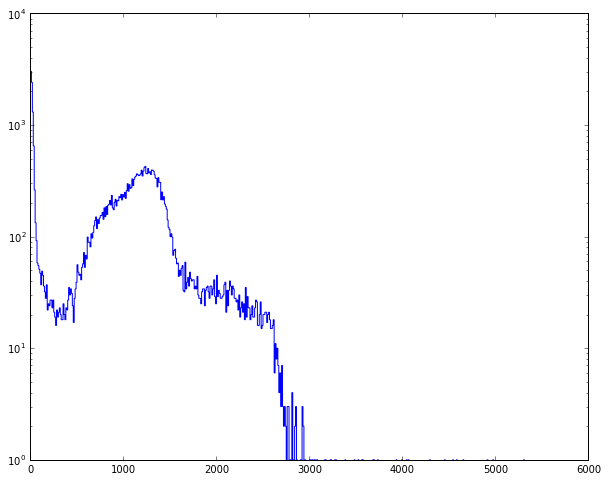

piled (3054,)


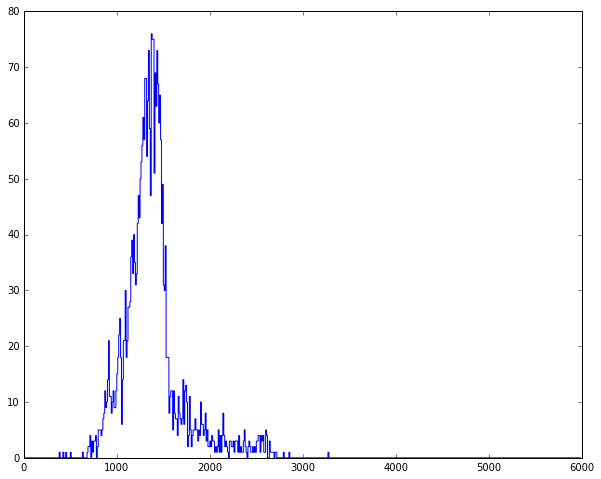

clock events (246,)


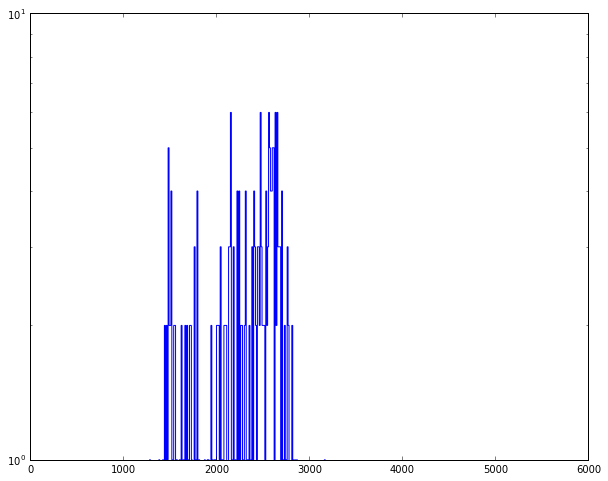

alpha (10959,)


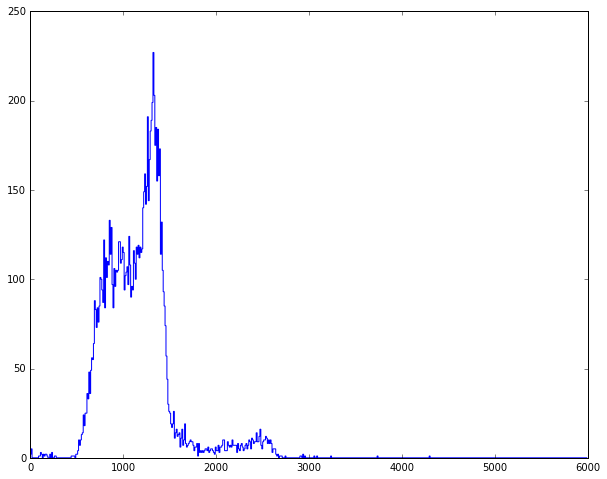

LS (24111,)


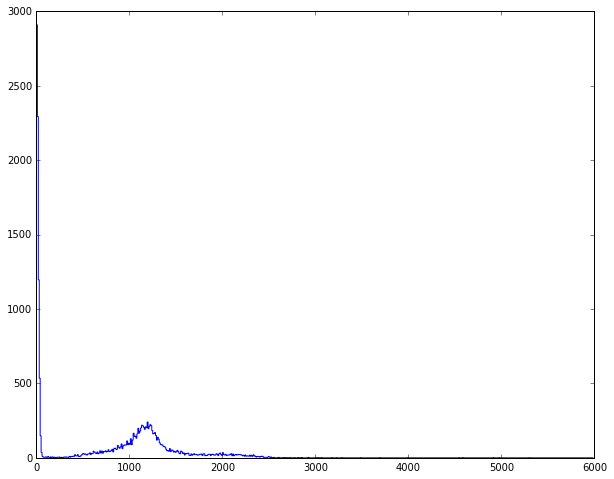

LS+beta (2834,)


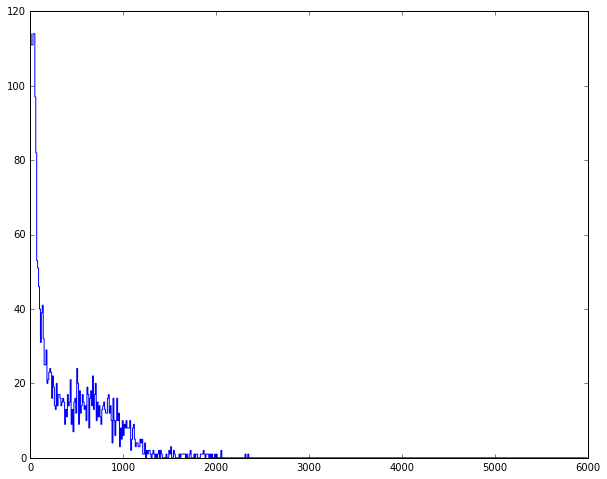

Ref (47,)


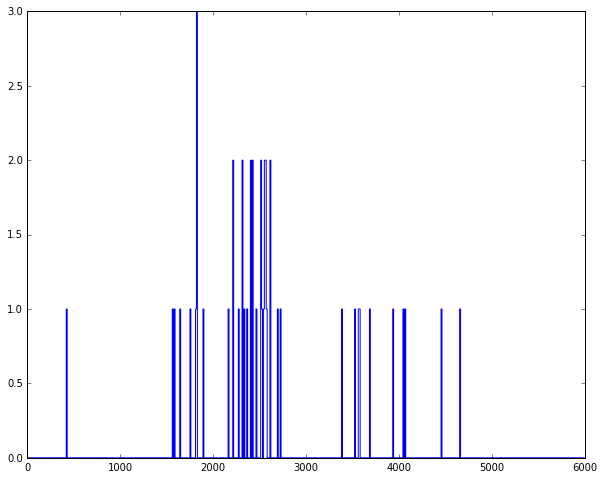

Uncertain (8,)


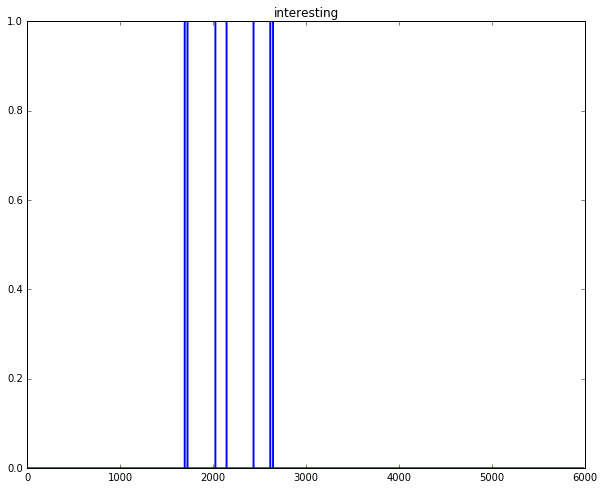

In [15]:
# plt.rcParams['figure.figsize'] = 5.0, 4.0

indices_1 = np.argmax(pred, axis=1)
indices_2 = np.argmax(pred_2, axis=1)

pred_2_error = np.diff(pred_2,axis=1)
print(abs(float(pred_2_error[0])))

error = np.zeros(len(pred_2))
for i in range(len(pred_2)):
    if abs(float(pred_2_error[i]))<0.1:
        error[i] = 1
    else:
        error[i] = 0
        
groups = np.zeros(len(pred_2))

for i in range(len(pred_2)):
    if indices_1[i]==2 or indices_1[i]==5:
        if error[i]==1:
            groups[i]=6
        else:
            if indices_2[i]==0:
                groups[i]=2
            if indices_2[i]==1:
                groups[i]=5
    else:
        groups[i]=indices_1[i]

# for i in range(len(PMTALL_pre_analysis)):
#     if indices_1[i]==2 or indices_1[i]==5:
#         if indices_2[i]==0:
#             groups[i]=2
#         if indices_2[i]==1:
#             groups[i]=5
#         else:
#             groups[i]=indices_1[i]
#     else:
#         groups[i]=indices_1[i]

energy = read_root("CAT009-230-001.root", tree, columns=["Energy"],flatten=["Energy"])
l,h = energy.shape
li=int(l/3)
def reshape_Energy(x,n,l):
    return x.Energy.values.reshape(n,l)
energy1 = reshape_Energy(energy,li,3)
Energy = energy1[:,1]
Energy = np.expand_dims(Energy, axis=1)

bins = np.arange(0,6000,10)
counts0 = np.array([])
counts1 = np.array([])
counts2 = np.array([])
counts3 = np.array([])
counts4 = np.array([])
counts5 = np.array([])
counts6 = np.array([])
all_counts = np.array([])

for i in range(len(pred_2)):
    if groups[i]==0:
        counts0 = np.concatenate((counts0, Energy[i]), axis=0)
    if groups[i]==1:
        counts1 = np.concatenate((counts1, Energy[i]), axis=0)
    if groups[i]==2:
        counts2 = np.concatenate((counts2, Energy[i]), axis=0)
    if groups[i]==3:
        counts3 = np.concatenate((counts3, Energy[i]), axis=0)
    if groups[i]==4:
        counts4 = np.concatenate((counts4, Energy[i]), axis=0)
    if groups[i]==5:
        counts5 = np.concatenate((counts5, Energy[i]), axis=0)
    if groups[i]==6:
        counts6 = np.concatenate((counts6, Energy[i]), axis=0)
    all_counts = np.concatenate((all_counts, Energy[i]), axis=0)

print("all",all_counts.shape)
plt.figure()
plt.hist(all_counts,stacked=False,bins=bins,histtype="step")
plt.yscale("log")
plt.show()    

print("piled",counts0.shape)
plt.figure()
plt.hist(counts0,stacked=False,bins=bins,histtype="step")
# plt.yscale("log")
plt.show()

print("clock events",counts1.shape)
plt.figure()
plt.hist(counts1,stacked=False,bins=bins,histtype="step")
plt.yscale("log")
plt.show()

print("alpha",counts2.shape)
plt.figure()
plt.hist(counts2,stacked=False,bins=bins,histtype="step")
# plt.yscale("log")
plt.show()

print("LS",counts3.shape)
plt.figure()
plt.hist(counts3,stacked=False,bins=bins,histtype="step")
# plt.yscale("log")
plt.show()

print("LS+beta",counts4.shape)
plt.figure()
plt.hist(counts4,stacked=False,bins=bins,histtype="step")
# plt.yscale("log")
plt.show()

print("Ref",counts5.shape)
plt.figure()
plt.hist(counts5,stacked=False,bins=bins,histtype="step")
# plt.yscale("log")
plt.show()

print("Uncertain",counts6.shape)
plt.figure()
plt.title("interesting")
plt.hist(counts6,stacked=False,bins=bins,histtype="step")
# plt.yscale("log")
plt.show()

# Beyond 3000keV

This definately requires more work as I extract the high probabilty for all possible outcome.

For cases where the probaility is not quite the highest, 0.5 class A and 0,4 class B. obviously there is some overlap in this case. I have to figure out a way to do this code, not a striaghtforward to implement, have to figure it out!!

TO simplify the amount of data to go through I considered only energy above 3000keV

In [3]:
%%time

energy_test = read_root("TEST.root", "tree", columns=["Energy"], flatten=["Energy"])

l_test,h = energy_test.shape
l_test=int(l_test/3)

def reshape_Energy(x,n,l):
    return x.Energy.values.reshape(n,l)

energy_test = reshape_Energy(energy_test,l_test,3)

PMTALL_test = NORM("TEST.root", "tree", "PMTALL")
PMTALL_ref = NORM(file_ref, tree, data)
Standard = np.average(PMTALL_ref,axis=0)

del PMTALL_ref

PMTALL_diff_test = differ(PMTALL_test, Standard)

Energy_test = np.expand_dims(energy_test[:,1], axis=1)

from keras.models import load_model
model = load_model("CNN_1-2.h5")
model_2 = load_model("CNN_2-2.h5")

data_test_1 = np.expand_dims(PMTALL_test, axis=2)
data_test_2 = np.expand_dims(PMTALL_diff_test, axis=2)

del PMTALL_test, PMTALL_diff_test

predict_test_1 = model.predict(data_test_1, batch_size=50, verbose=1)
predict_test_2 = model_2.predict(data_test_2, batch_size=50, verbose=1)

del data_test_1, data_test_2

test_out_1 = np.argmax(predict_test_1, axis=1)
test_out_2 = np.argmax(predict_test_2, axis=1)

print(test_out_2)
pred_2_error2 = np.diff(predict_test_2,axis=1)

error2 = np.zeros(len(Energy_test))
for i in range(len(pred_2_error2)):
    if abs(float(pred_2_error2[i]))<0.1:
        error2[i] = 1
    else:
        error2[i] = 0

test_out = np.zeros(len(Energy_test))
for i in range(len(Energy_test)):
#     if test_out_1[i]==2 or test_out_1[i]==5:
#         print("got")
#         if error2[i] == 1:
#             test_out[i] = 6
#         else:
#             if test_out_2[i] == 0:
#                 test_out[i] = 2
#             if test_out_2[i] == 1:
#                 test_out[i] = 5
#     else:
    test_out[i] = test_out_1[i]
        
### MOD this need ways to extract ambiguous cases
# for i in range(len(Energy_test)):
#     if test_out_1[i]==2 or test_out_1[i]==5:
#         if test_out_2[i]==0:
#             test_out[i]=2
#         if test_out_2[i]==1:
#             test_out[i]=5
#     else:
#         test_out[i]=test_out_1[i]




142100/142115 [============================>.] - ETA:  - ETA: 0s[0 1 0 ..., 0 0 0]
CPU times: user 42min 41s, sys: 3min 42s, total: 46min 23s
Wall time: 11min 43s


2017-12-07 16:41:56.065586: I tensorflow/core/platform/cpu_feature_guard.cc:137] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX



 all (142115,)


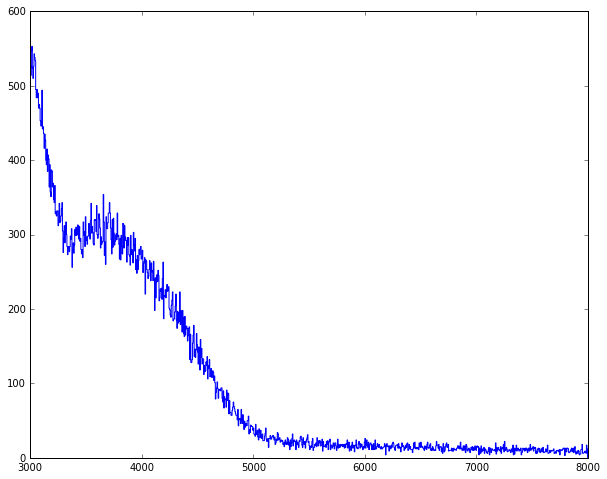


 piled (6,)


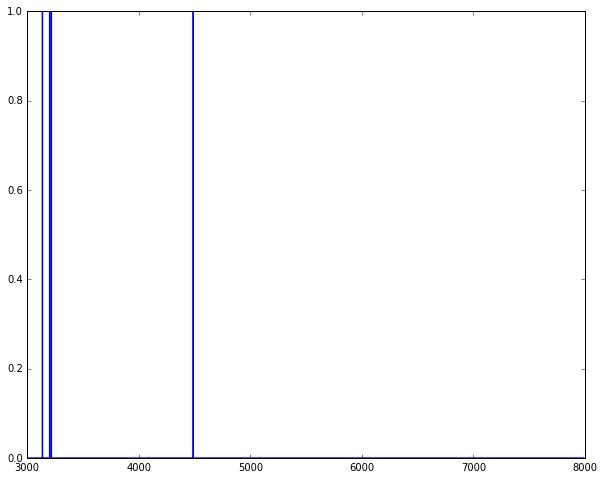

clock events? (0,)


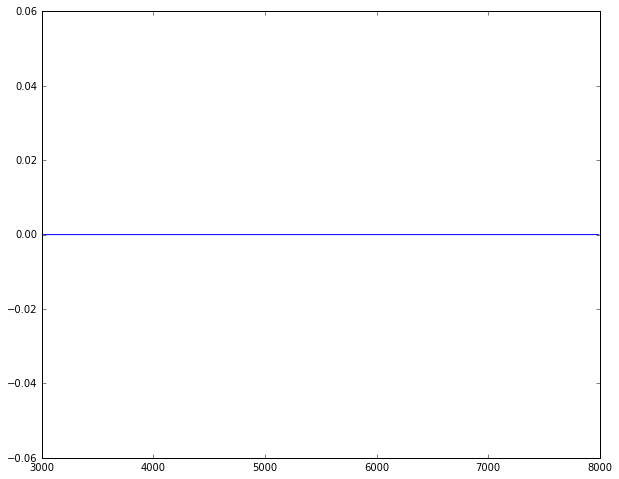

alpha? (2,)


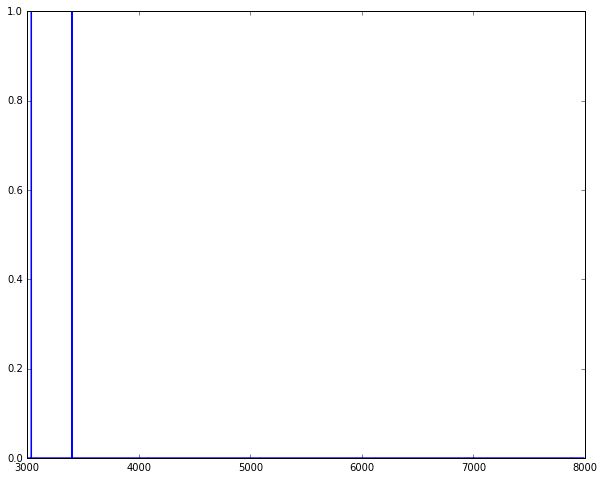

LS? (141779,)


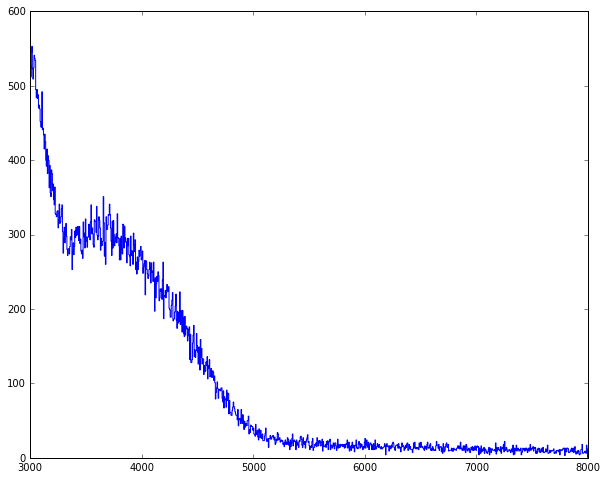

LS_beta (328,)


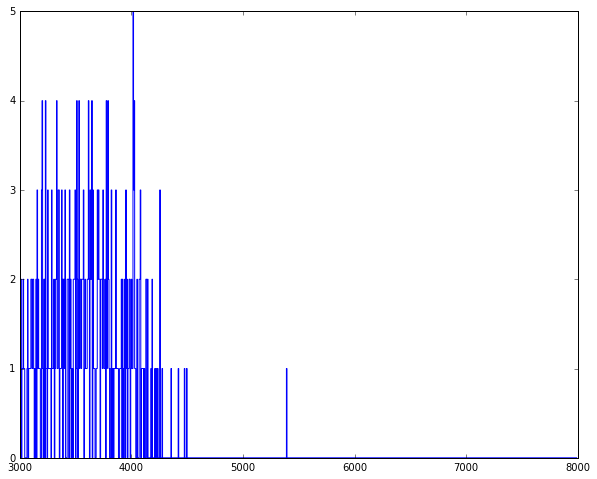

Ref (0,)


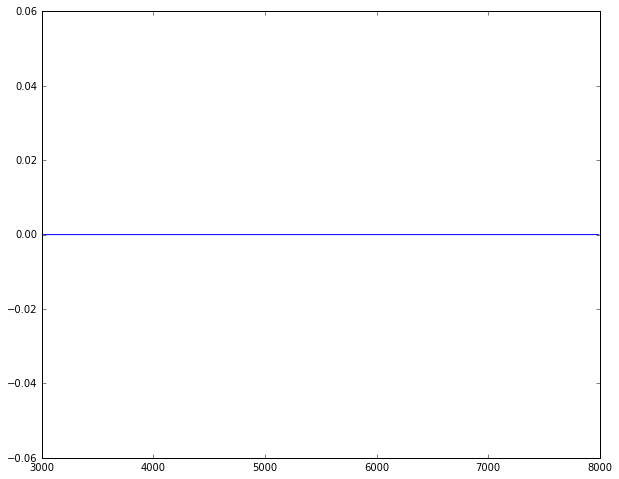

uncertain (0,)


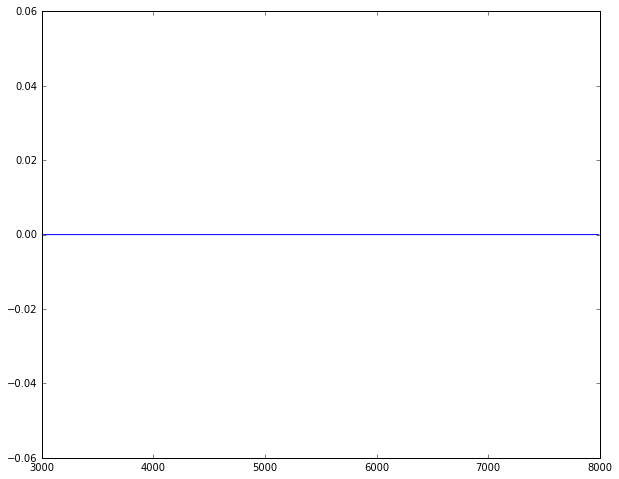

In [4]:
bins = np.arange(3000,8000,5)
counts0 = np.array([])
counts1 = np.array([])
counts2 = np.array([])
counts3 = np.array([])
counts4 = np.array([])
counts5 = np.array([])
counts6 = np.array([])
all_counts = np.array([])

for i in range(len(test_out)):
    if test_out[i]==0:
        counts0 = np.concatenate((counts0, Energy_test[i]), axis=0)
    if test_out[i]==1:
        counts1 = np.concatenate((counts1, Energy_test[i]), axis=0)
    if test_out[i]==2:
        counts2 = np.concatenate((counts2, Energy_test[i]), axis=0)
    if test_out[i]==3:
        counts3 = np.concatenate((counts3, Energy_test[i]), axis=0)
    if test_out[i]==4:
        counts4 = np.concatenate((counts4, Energy_test[i]), axis=0)
    if test_out[i]==5:
        counts5 = np.concatenate((counts5, Energy_test[i]), axis=0)
    if test_out[i]==6:
        counts6 = np.concatenate((counts6, Energy_test[i]), axis=0)
for i in range(len(test_out)):
    all_counts = np.concatenate((all_counts, Energy_test[i]), axis=0)

print("\n all", all_counts.shape)
plt.figure()
plt.hist(all_counts, stacked=False, bins=bins,histtype="step")
# plt.yscale("log")
plt.show()

print("\n piled", counts0.shape)
plt.figure()
plt.hist(counts0, stacked=False, bins=bins,histtype="step")
# plt.yscale("log")
plt.show()

print("clock events?",counts1.shape)
plt.figure()
plt.hist(counts1, stacked=False, bins=bins,histtype="step")
# plt.yscale("log")
plt.show()

print("alpha?",counts2.shape)
plt.figure()
plt.hist(counts2, stacked=False, bins=bins,histtype="step")
# plt.yscale("log")
plt.show()

print("LS?",counts3.shape)
plt.figure()
plt.hist(counts3,stacked=False,bins=bins,histtype="step")
# plt.yscale("log")
plt.show()

print("LS_beta",counts4.shape)
plt.figure()
plt.hist(counts4,stacked=False,bins=bins,histtype="step")
# plt.yscale("log")
plt.show()

print("Ref",counts5.shape)
plt.figure()
plt.hist(counts5,stacked=False,bins=bins,histtype="step")
# plt.yscale("log")
plt.show()

print("uncertain",counts6.shape)
plt.figure()
plt.hist(counts6,stacked=False,bins=bins,histtype="step")
# plt.yscale("log")
plt.show()

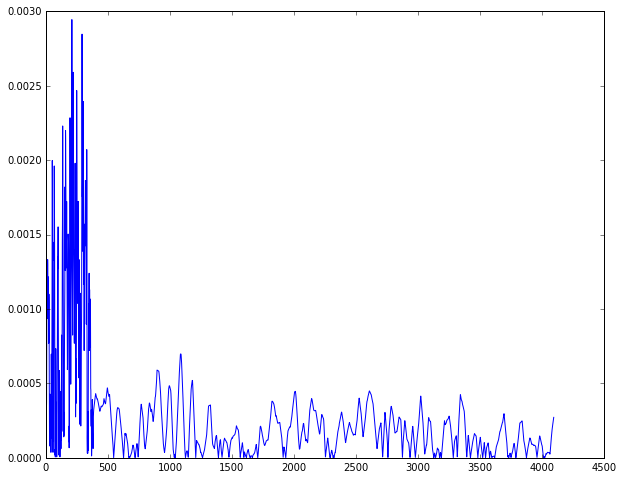

piled, flat, alpha, ls, 
 ls+beta, ref
[  2.13390887e-34   1.00000000e+00   1.01241337e-37   0.00000000e+00
   0.00000000e+00   0.00000000e+00]


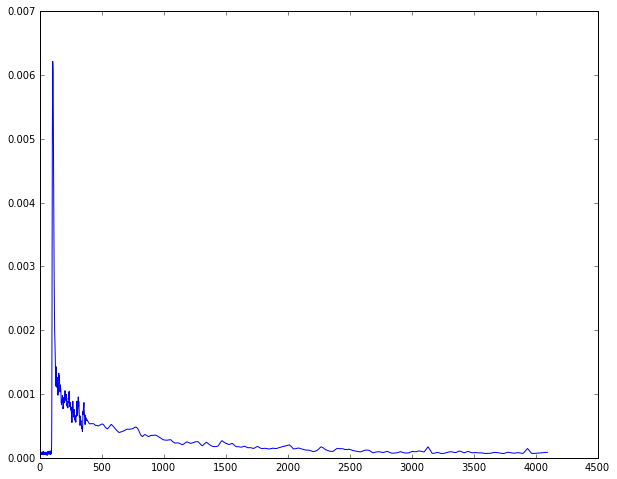

piled, flat, alpha, ls, 
 ls+beta, ref
[  1.53087889e-08   1.00000000e+00   7.79217203e-15   1.98594011e-15
   2.71915152e-16   5.86506431e-28]


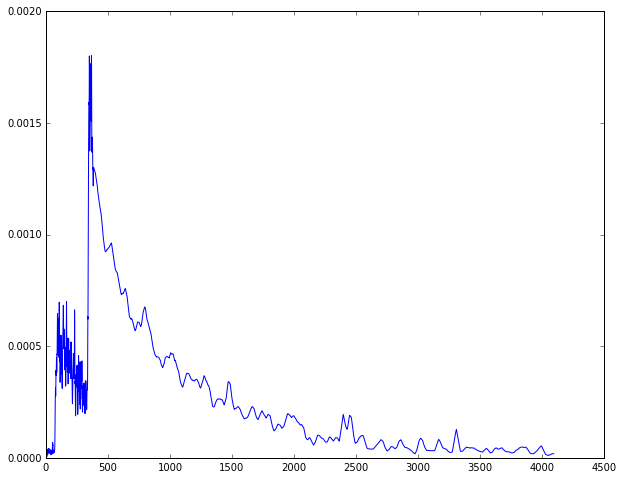

piled, flat, alpha, ls, 
 ls+beta, ref
[  2.63716760e-19   1.00000000e+00   1.07949359e-23   8.36300171e-30
   4.06329424e-35   0.00000000e+00]


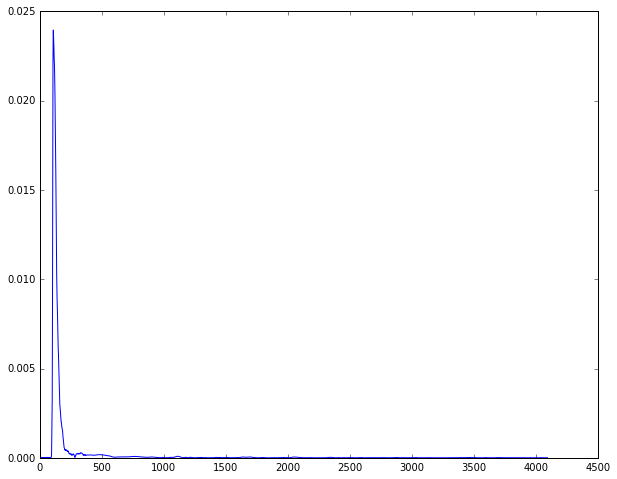

piled, flat, alpha, ls, 
 ls+beta, ref
[  3.14015231e-16   1.00000000e+00   2.71722579e-14   6.82289412e-31
   2.22583184e-34   0.00000000e+00]


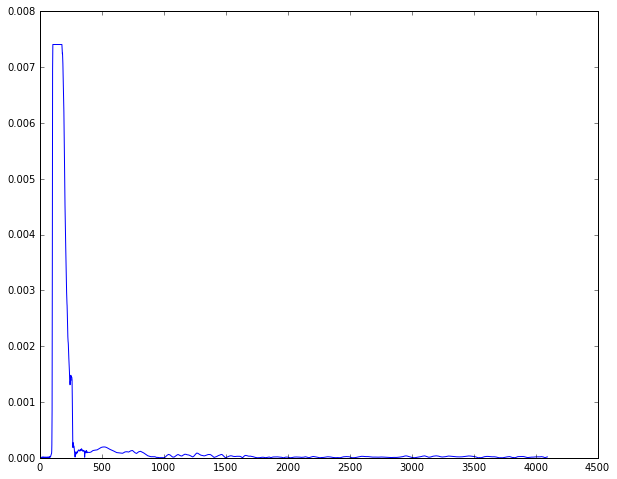

piled, flat, alpha, ls, 
 ls+beta, ref
[  4.24828078e-22   1.00000000e+00   5.36124739e-20   9.84178972e-35
   1.97425533e-37   0.00000000e+00]


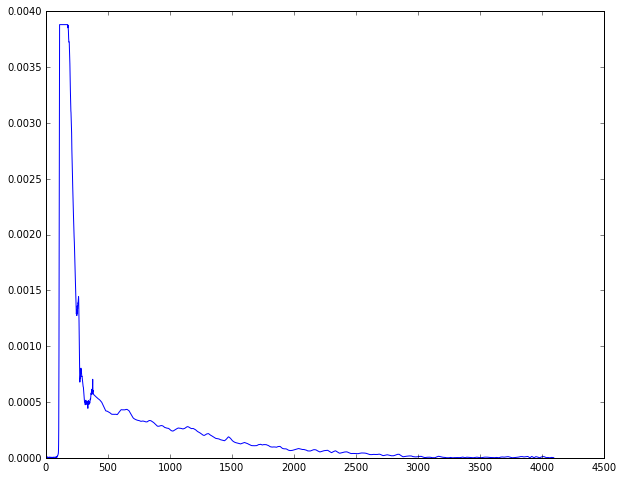

piled, flat, alpha, ls, 
 ls+beta, ref
[  2.93360597e-16   1.00000000e+00   3.90587935e-17   2.71850638e-25
   6.56647801e-29   0.00000000e+00]


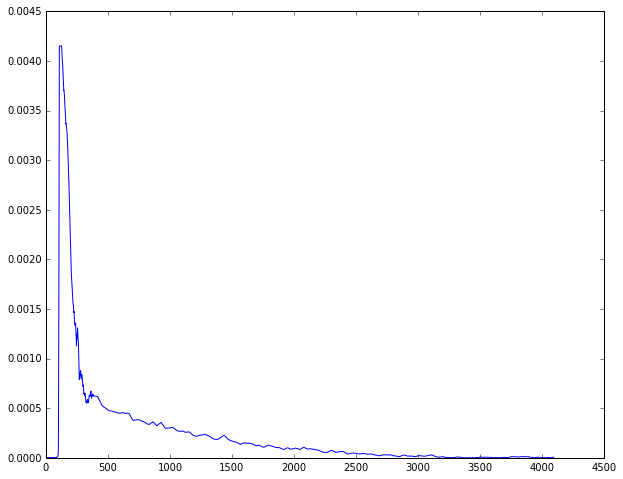

piled, flat, alpha, ls, 
 ls+beta, ref
[  3.77949489e-14   1.00000000e+00   1.32039604e-14   9.29660132e-22
   6.71444876e-24   9.97710695e-37]


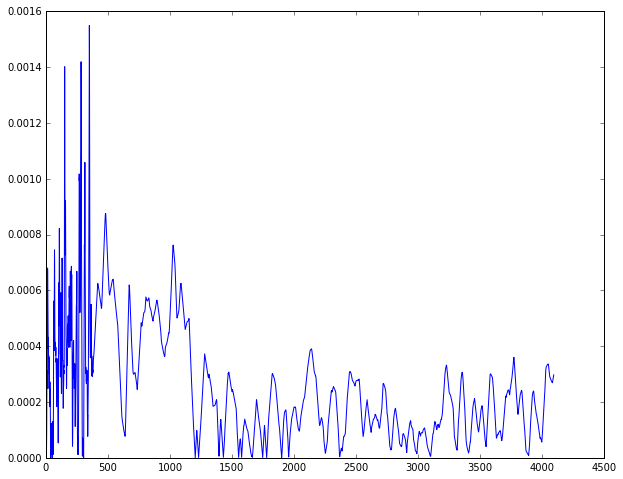

piled, flat, alpha, ls, 
 ls+beta, ref
[  8.81072024e-28   1.00000000e+00   2.30343849e-32   5.77938111e-35
   0.00000000e+00   0.00000000e+00]


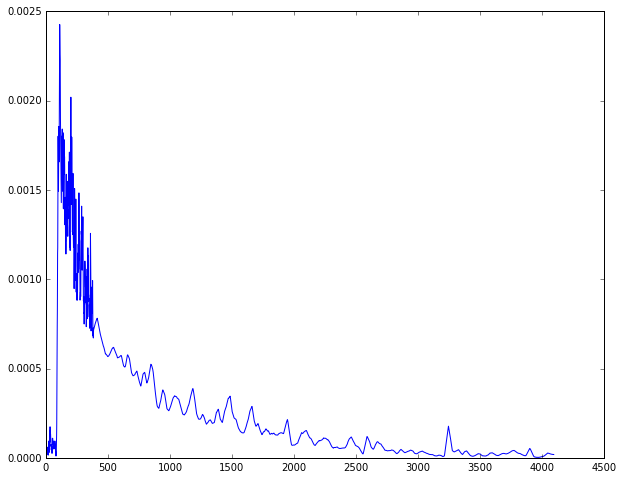

piled, flat, alpha, ls, 
 ls+beta, ref
[  4.82958175e-16   1.00000000e+00   5.68693780e-20   9.24252550e-24
   1.26089297e-28   0.00000000e+00]


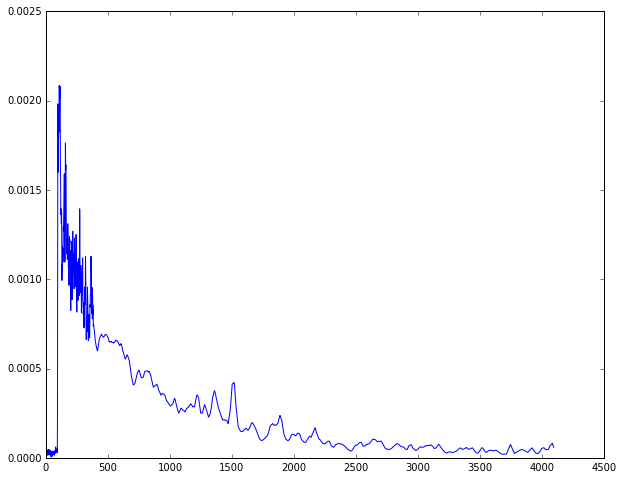

piled, flat, alpha, ls, 
 ls+beta, ref
[  3.47018438e-18   1.00000000e+00   9.75264004e-23   6.21287682e-26
   1.24768052e-31   0.00000000e+00]


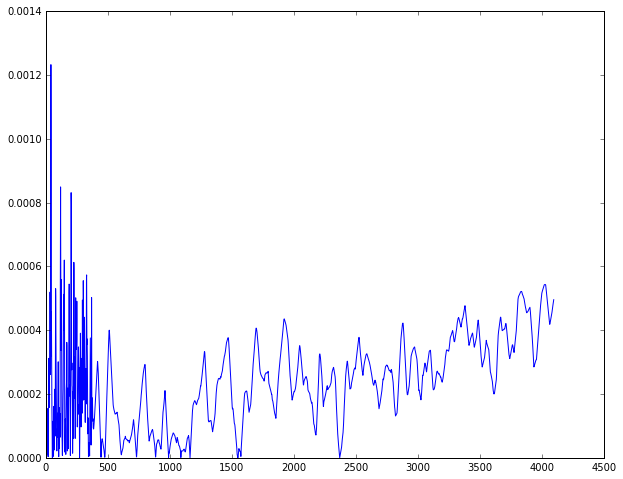

piled, flat, alpha, ls, 
 ls+beta, ref
[  1.64523467e-22   1.00000000e+00   2.95129652e-23   3.29786053e-18
   3.89436100e-26   0.00000000e+00]


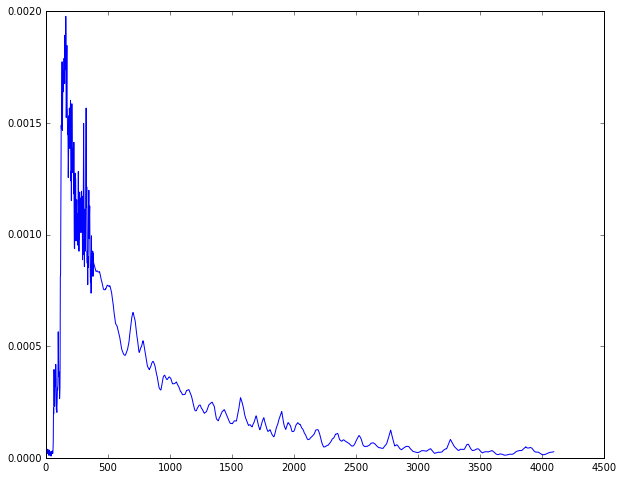

piled, flat, alpha, ls, 
 ls+beta, ref
[  5.09998792e-15   1.00000000e+00   5.36354373e-18   1.17938608e-21
   7.09256766e-26   0.00000000e+00]


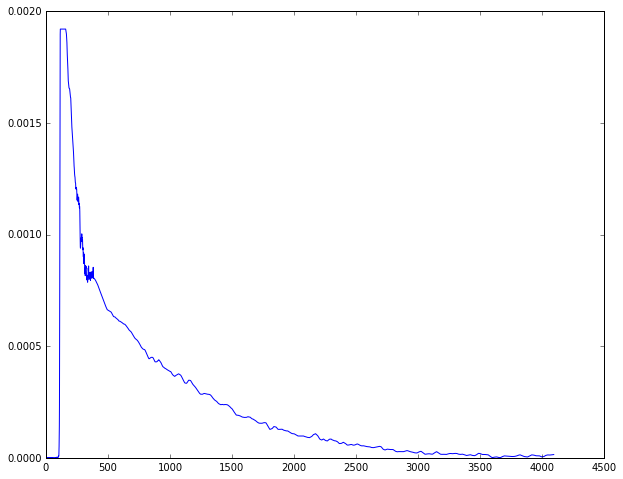

piled, flat, alpha, ls, 
 ls+beta, ref
[  4.80398886e-15   1.00000000e+00   2.48831128e-18   5.79768084e-22
   2.13342917e-26   0.00000000e+00]


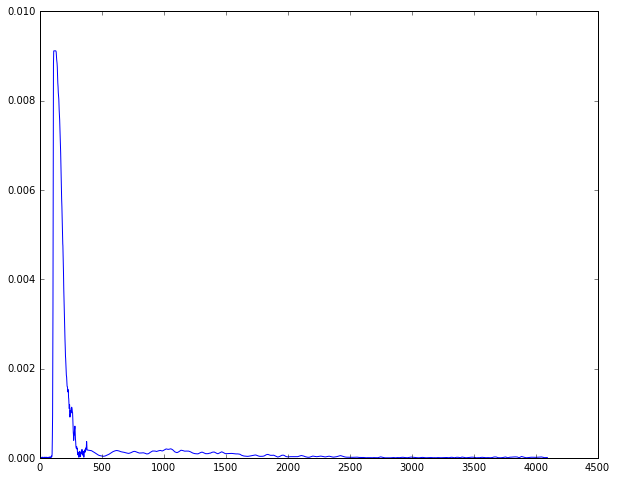

piled, flat, alpha, ls, 
 ls+beta, ref
[  2.01493613e-24   1.00000000e+00   8.62431967e-24   7.27572234e-37
   0.00000000e+00   0.00000000e+00]


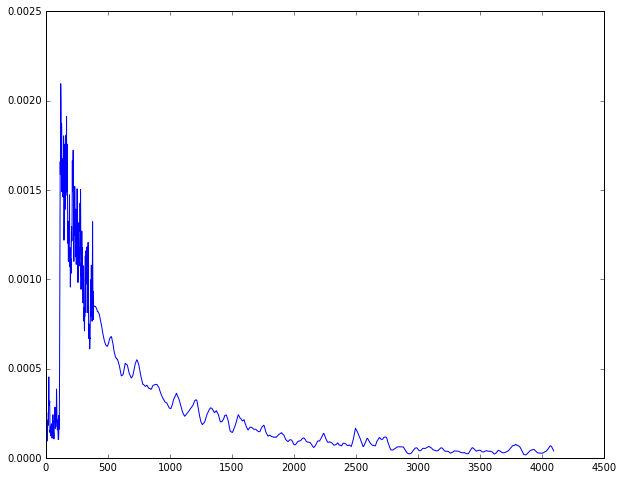

piled, flat, alpha, ls, 
 ls+beta, ref
[  8.05023024e-23   1.00000000e+00   8.50521382e-28   2.74134319e-33
   0.00000000e+00   0.00000000e+00]


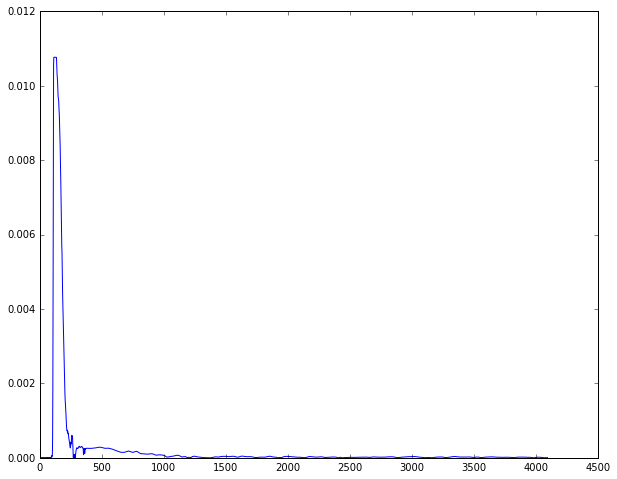

piled, flat, alpha, ls, 
 ls+beta, ref
[  9.13699376e-27   1.00000000e+00   1.54131354e-25   0.00000000e+00
   0.00000000e+00   0.00000000e+00]


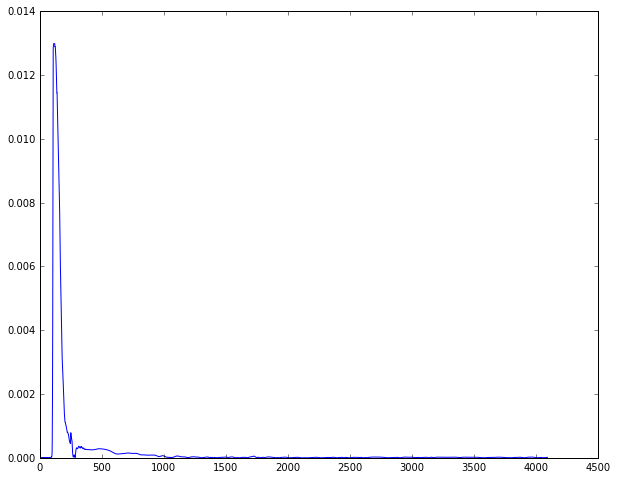

piled, flat, alpha, ls, 
 ls+beta, ref
[  7.00578055e-22   1.00000000e+00   1.64278509e-19   8.89626982e-35
   8.79077637e-36   0.00000000e+00]


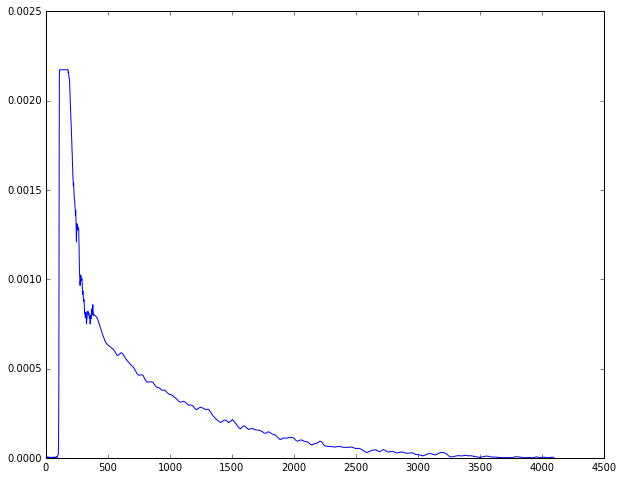

piled, flat, alpha, ls, 
 ls+beta, ref
[  7.67883546e-14   1.00000000e+00   2.95396546e-16   6.63430961e-21
   9.08386447e-25   7.35910332e-36]


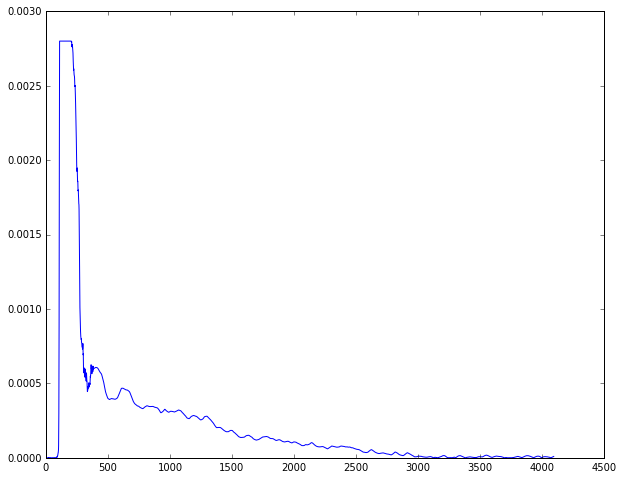

piled, flat, alpha, ls, 
 ls+beta, ref
[  2.31022663e-14   1.00000000e+00   2.00934095e-16   1.47682177e-23
   1.39749868e-27   2.63583591e-37]


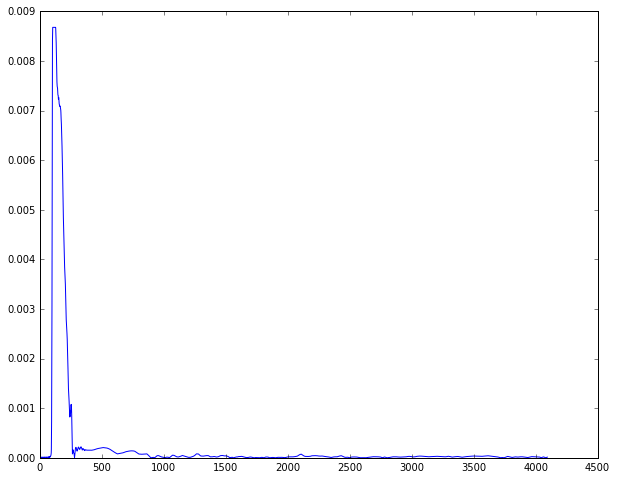

piled, flat, alpha, ls, 
 ls+beta, ref
[  1.56188088e-18   1.00000000e+00   1.45159297e-15   6.51594537e-30
   3.03503162e-30   0.00000000e+00]


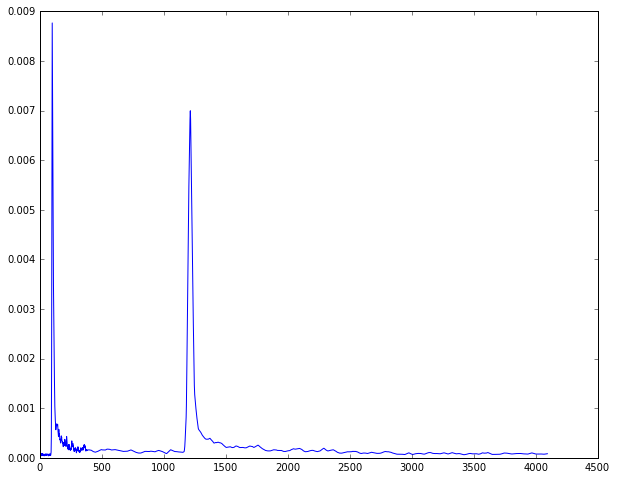

piled, flat, alpha, ls, 
 ls+beta, ref
[  5.51733023e-21   1.00000000e+00   1.41058406e-26   3.98472014e-34
   1.74205403e-38   0.00000000e+00]


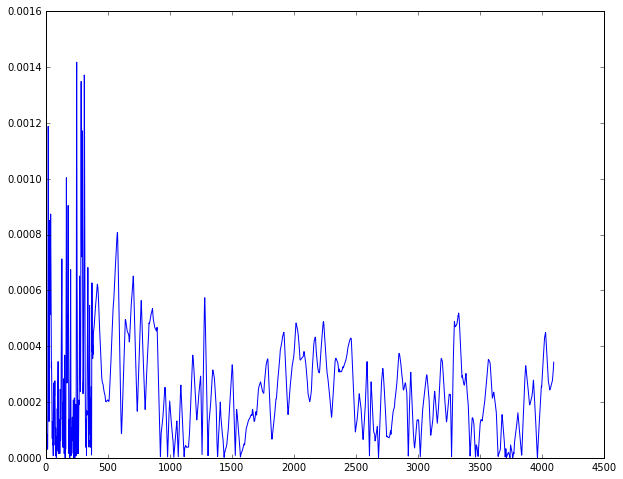

piled, flat, alpha, ls, 
 ls+beta, ref
[  1.79419880e-26   1.00000000e+00   2.38606169e-30   7.55767354e-31
   0.00000000e+00   0.00000000e+00]


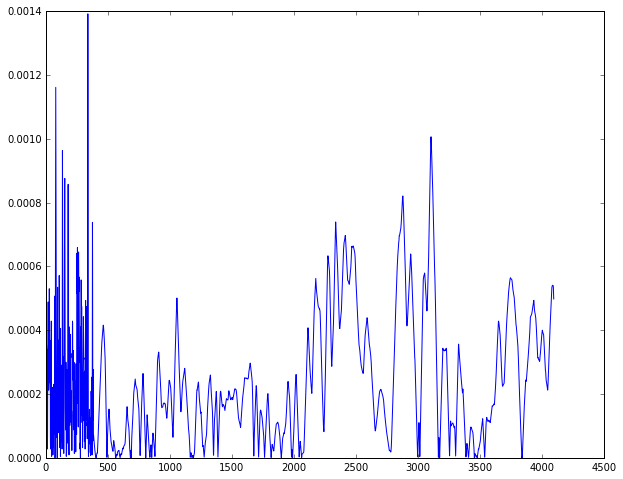

piled, flat, alpha, ls, 
 ls+beta, ref
[  1.52984524e-31   1.00000000e+00   1.70455405e-35   3.05873617e-34
   0.00000000e+00   0.00000000e+00]


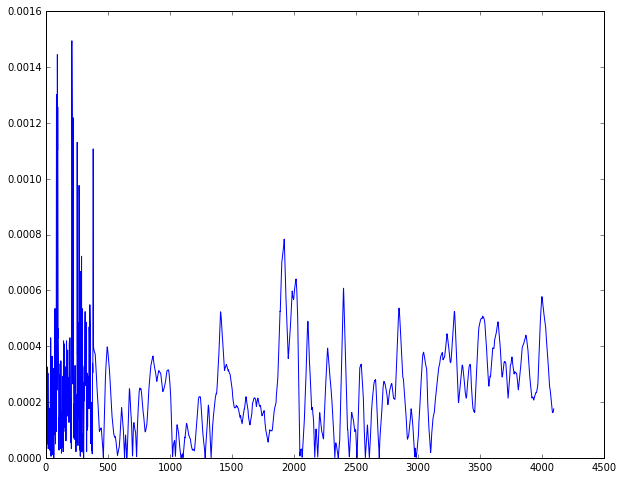

piled, flat, alpha, ls, 
 ls+beta, ref
[  2.74666619e-29   1.00000000e+00   1.16865349e-32   2.21525308e-33
   0.00000000e+00   0.00000000e+00]


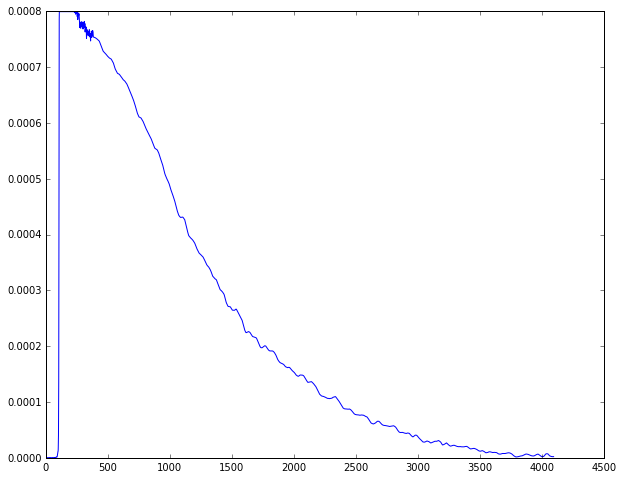

piled, flat, alpha, ls, 
 ls+beta, ref
[  1.36159461e-19   1.00000000e+00   1.36377374e-25   7.29125925e-28
   1.47273486e-34   0.00000000e+00]


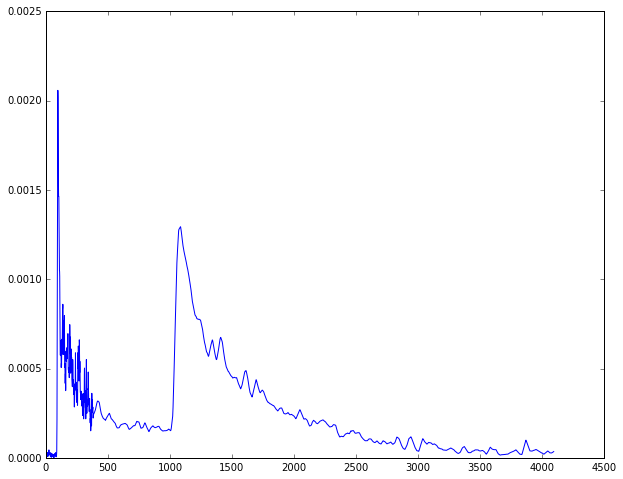

piled, flat, alpha, ls, 
 ls+beta, ref
[  6.65889194e-17   1.00000000e+00   1.45170113e-26   1.16084099e-27
   3.72727885e-36   0.00000000e+00]


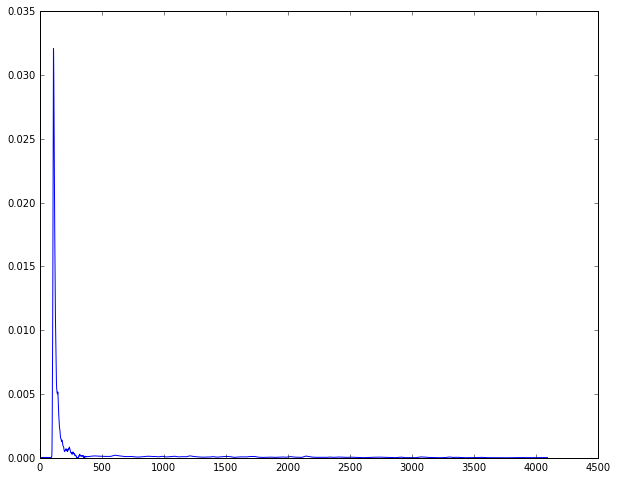

piled, flat, alpha, ls, 
 ls+beta, ref
[  3.68504123e-14   1.00000000e+00   2.14622887e-18   3.40235461e-31
   0.00000000e+00   0.00000000e+00]


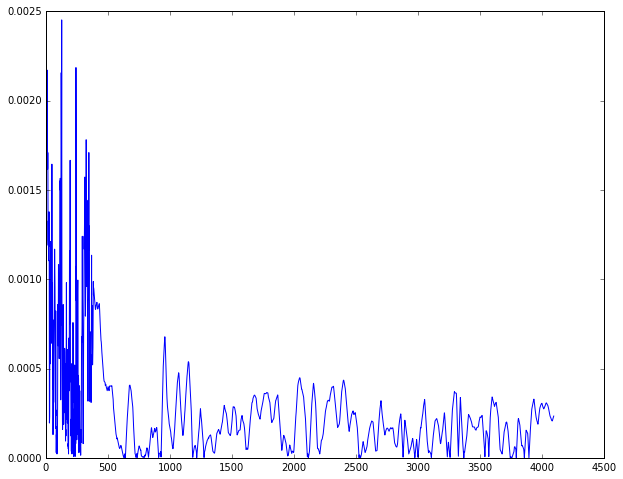

piled, flat, alpha, ls, 
 ls+beta, ref
[ 0.  1.  0.  0.  0.  0.]


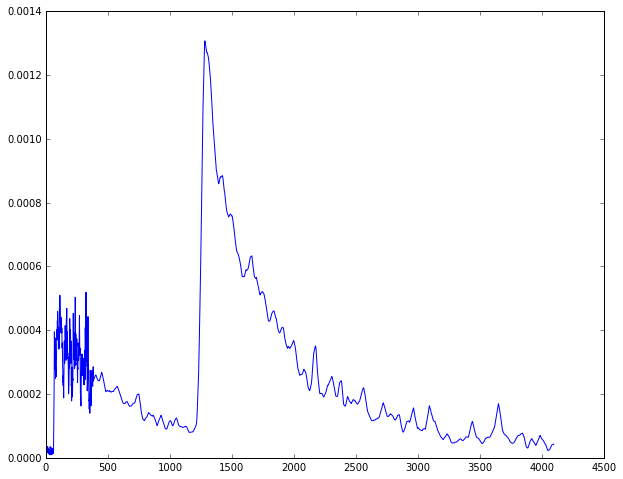

piled, flat, alpha, ls, 
 ls+beta, ref
[  5.79067982e-20   1.00000000e+00   3.44589658e-27   4.28421768e-28
   2.36001979e-36   0.00000000e+00]


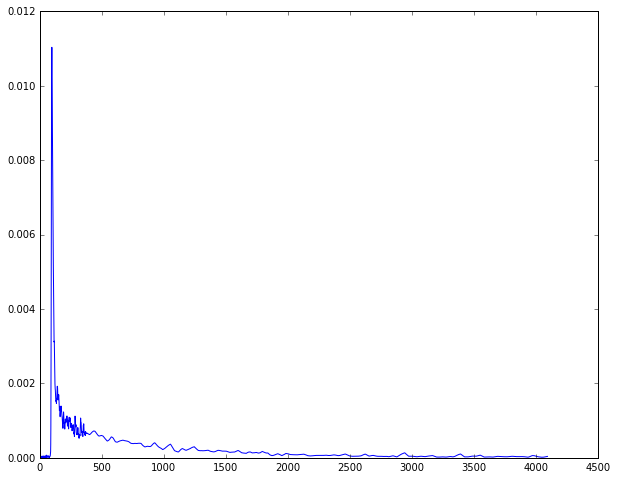

piled, flat, alpha, ls, 
 ls+beta, ref
[  2.36394722e-03   9.96384382e-01   6.72405122e-06   1.17874576e-03
   6.62036982e-05   5.75743229e-12]


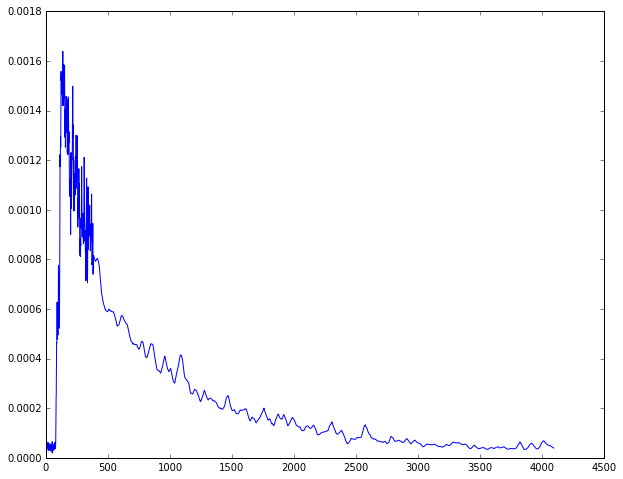

piled, flat, alpha, ls, 
 ls+beta, ref
[  1.16017277e-19   1.00000000e+00   1.17043391e-24   3.36822855e-28
   9.77466715e-35   0.00000000e+00]


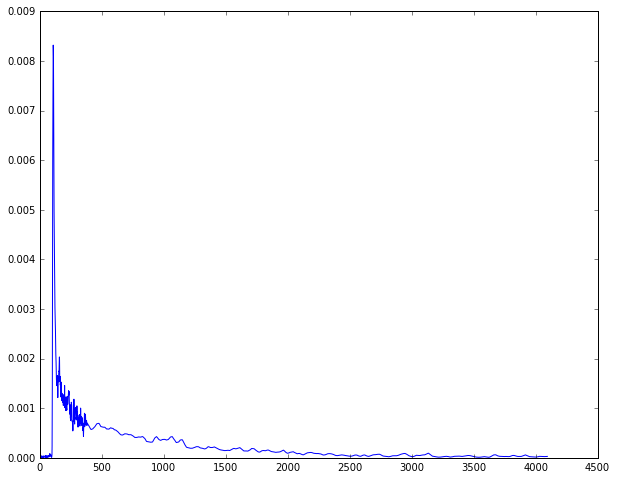

piled, flat, alpha, ls, 
 ls+beta, ref
[  8.49769322e-07   9.99999166e-01   1.73995378e-12   3.93929136e-16
   1.32860903e-16   9.32948085e-24]


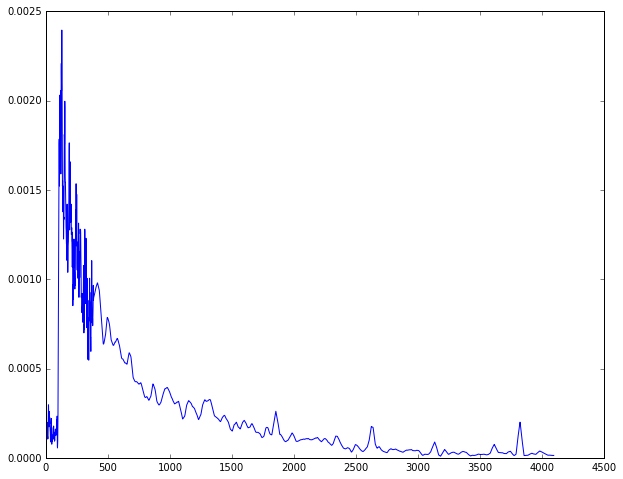

piled, flat, alpha, ls, 
 ls+beta, ref
[  7.72177848e-22   1.00000000e+00   8.92935386e-27   3.25663187e-32
   0.00000000e+00   0.00000000e+00]


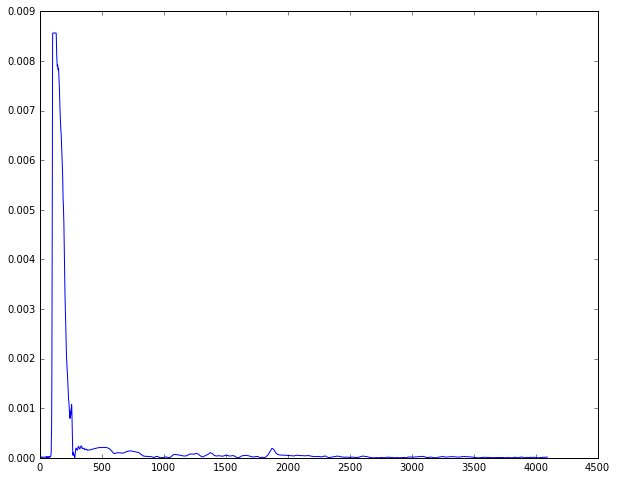

piled, flat, alpha, ls, 
 ls+beta, ref
[  5.69623001e-20   1.00000000e+00   2.49232149e-17   1.35429268e-31
   1.42731610e-32   0.00000000e+00]


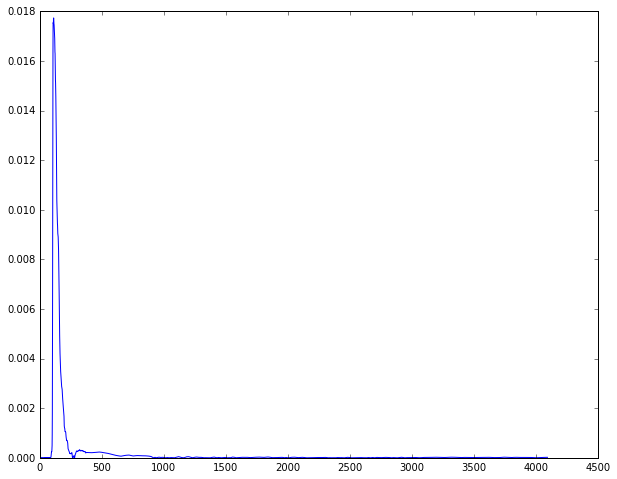

piled, flat, alpha, ls, 
 ls+beta, ref
[  3.14865506e-17   1.00000000e+00   1.77135274e-14   5.97635735e-30
   1.80959211e-30   0.00000000e+00]


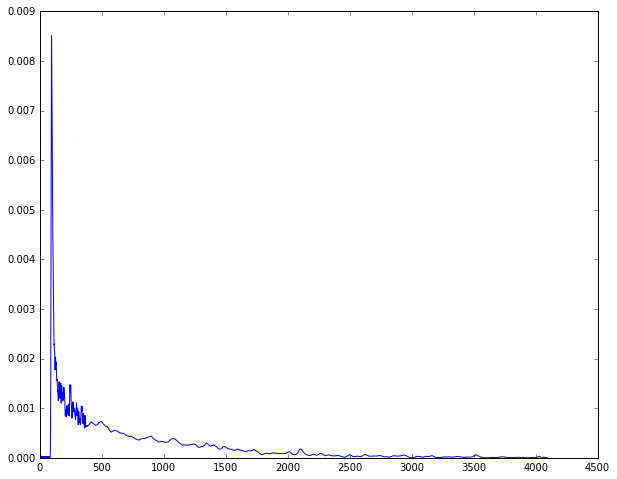

piled, flat, alpha, ls, 
 ls+beta, ref
[  2.83111306e-03   9.68639195e-01   2.12207960e-04   2.20944826e-02
   6.22290932e-03   8.51513804e-10]


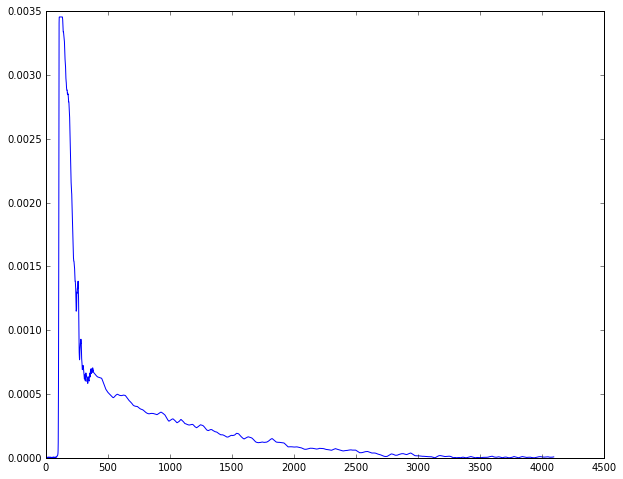

piled, flat, alpha, ls, 
 ls+beta, ref
[  5.49563040e-14   1.00000000e+00   9.02774068e-15   1.83363647e-21
   5.85617835e-24   3.50385923e-36]


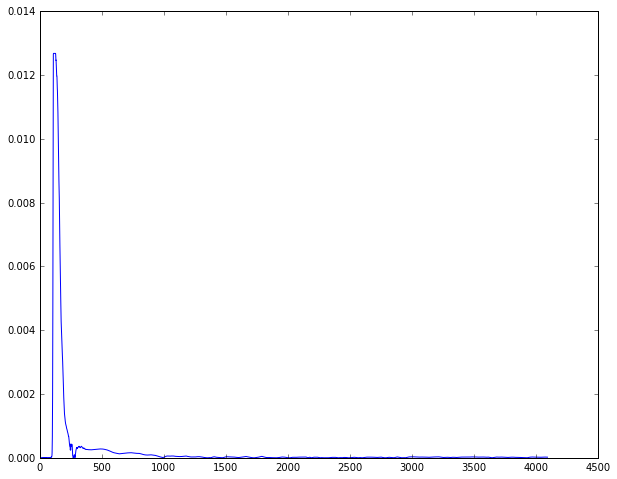

piled, flat, alpha, ls, 
 ls+beta, ref
[  4.82497969e-23   1.00000000e+00   5.00938721e-21   3.14786826e-36
   8.78406297e-38   0.00000000e+00]


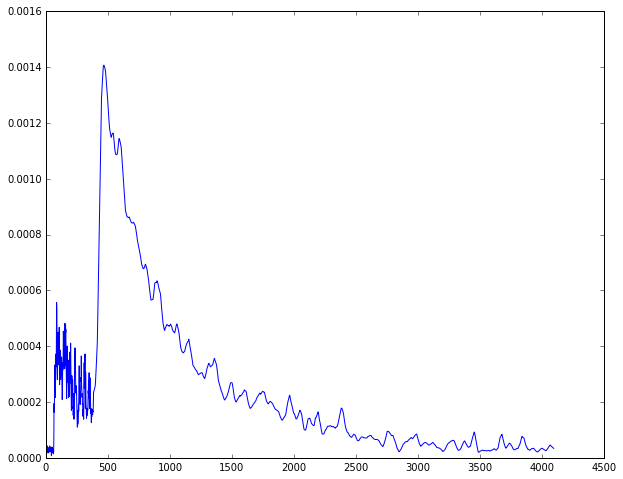

piled, flat, alpha, ls, 
 ls+beta, ref
[  2.82019475e-19   1.00000000e+00   5.08007885e-25   2.50031493e-29
   3.76375756e-35   0.00000000e+00]


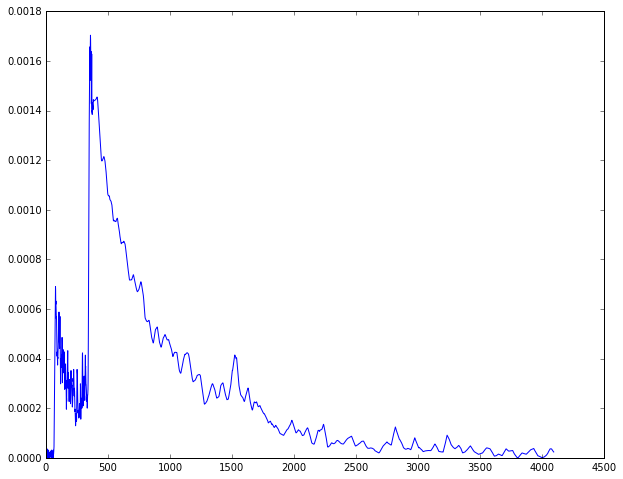

piled, flat, alpha, ls, 
 ls+beta, ref
[  3.08970038e-16   1.00000000e+00   2.31035180e-20   2.17981965e-25
   1.60671879e-29   0.00000000e+00]


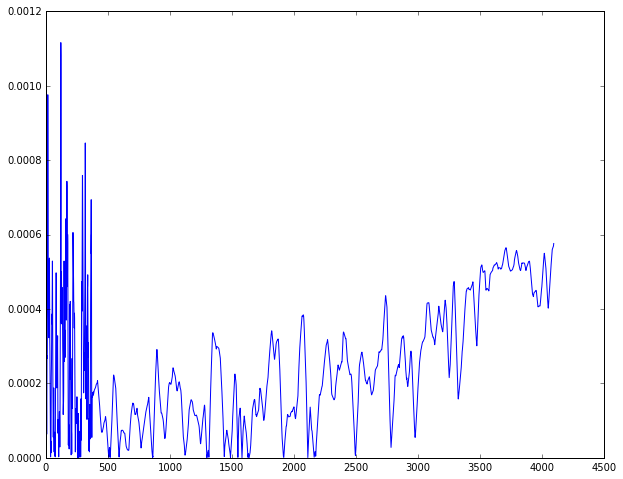

piled, flat, alpha, ls, 
 ls+beta, ref
[  5.02957038e-28   1.00000000e+00   1.04446294e-30   6.60899833e-29
   2.51283895e-38   0.00000000e+00]


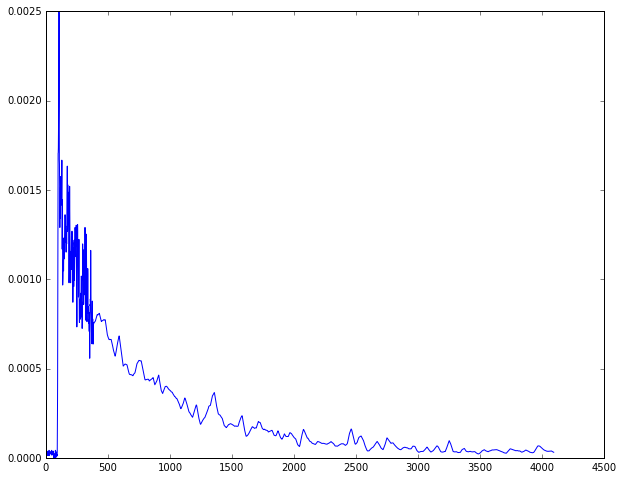

piled, flat, alpha, ls, 
 ls+beta, ref
[  1.04476468e-17   1.00000000e+00   1.64138579e-22   6.35097370e-26
   1.13110510e-31   0.00000000e+00]


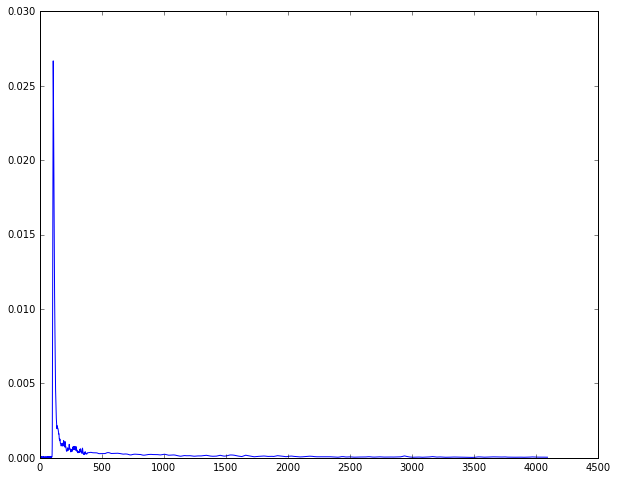

piled, flat, alpha, ls, 
 ls+beta, ref
[  5.05695880e-06   9.99994993e-01   8.40025112e-20   8.72833334e-24
   3.37729534e-28   2.09154374e-30]


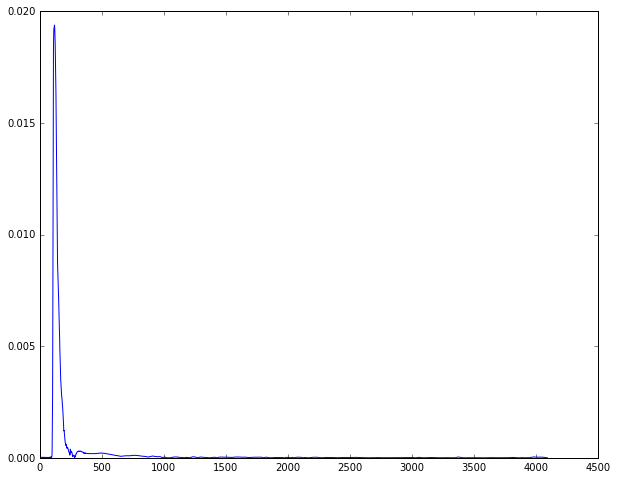

piled, flat, alpha, ls, 
 ls+beta, ref
[  1.38007485e-19   1.00000000e+00   2.08950951e-18   1.01526970e-33
   2.58244088e-36   0.00000000e+00]


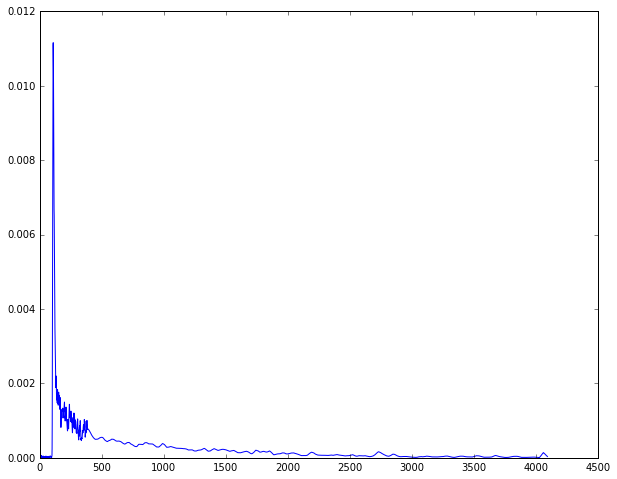

piled, flat, alpha, ls, 
 ls+beta, ref
[  1.45589816e-04   9.99854445e-01   7.91398683e-11   1.45639048e-14
   5.07075003e-15   5.74410399e-19]


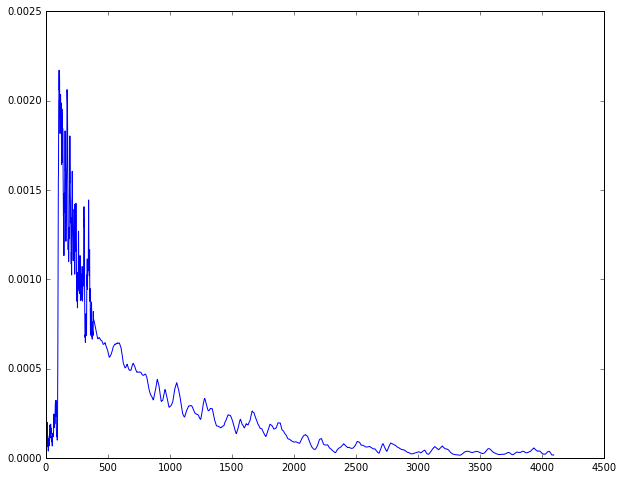

piled, flat, alpha, ls, 
 ls+beta, ref
[  1.27070638e-18   1.00000000e+00   1.11084603e-22   1.93773474e-27
   3.85107672e-33   0.00000000e+00]


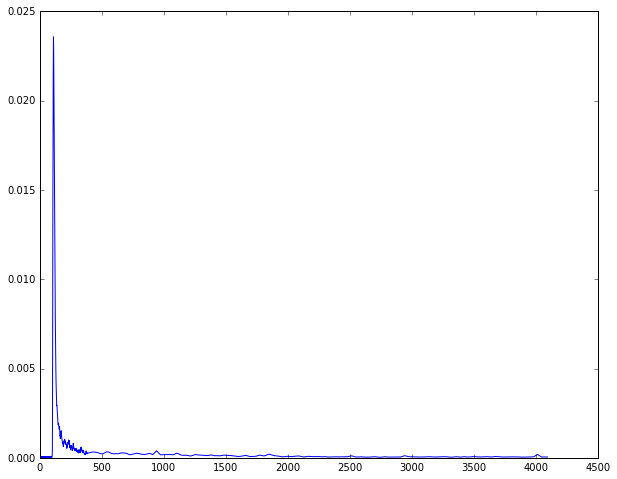

piled, flat, alpha, ls, 
 ls+beta, ref
[  2.77806151e-07   9.99999762e-01   2.09816033e-17   6.22274860e-24
   4.65949169e-29   1.72876181e-29]


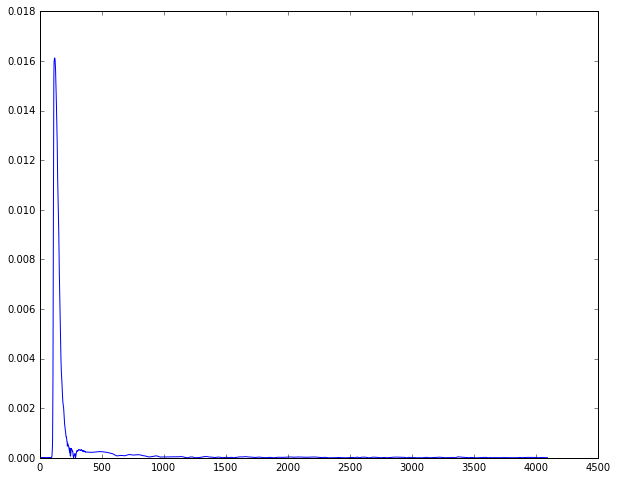

piled, flat, alpha, ls, 
 ls+beta, ref
[  2.39243980e-24   1.00000000e+00   8.92037916e-24   0.00000000e+00
   0.00000000e+00   0.00000000e+00]


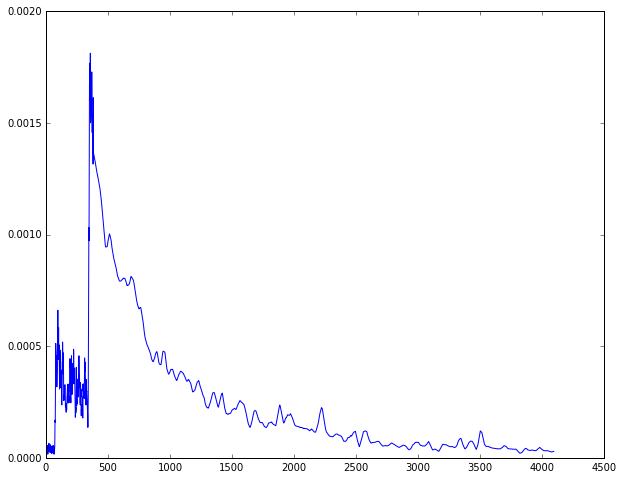

piled, flat, alpha, ls, 
 ls+beta, ref
[  8.45611179e-19   1.00000000e+00   5.17743485e-23   5.40720962e-29
   4.35982957e-34   0.00000000e+00]


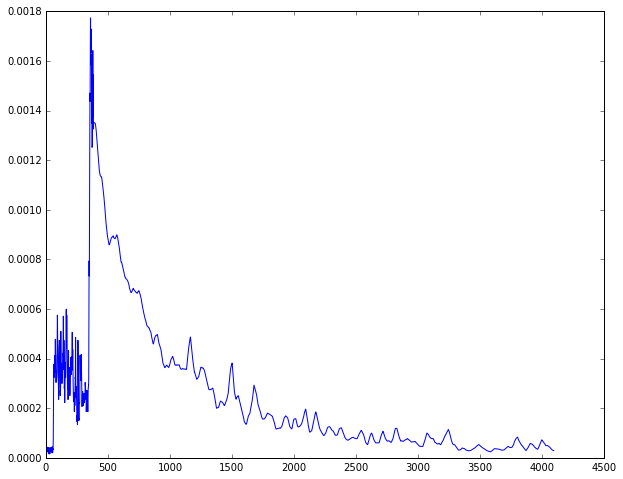

piled, flat, alpha, ls, 
 ls+beta, ref
[  1.76417320e-19   1.00000000e+00   9.63508004e-24   4.14430182e-29
   2.25433850e-34   0.00000000e+00]
CPU times: user 1min 10s, sys: 1min 20s, total: 2min 31s
Wall time: 3min 1s


In [16]:
%%time
dummy=0

PMTALL_test = NORM("TEST.root", "tree", "PMTALL")

for i in range(len(PMTALL_test)):
    k = np.random.randint(len(PMTALL_test))
    if test_out[k]==1:
        plt.figure()
        plt.plot(x,PMTALL_test[k])
        plt.show()
        print("piled, flat, alpha, ls, \n ls+beta, ref")
        print(predict_test_1[k])
        print("alpha, Ref")
        print(predict_test_2[k])
        dummy += 1
    if dummy==50:
        break
    

# Features extractor

Study the weights of the CNNs.

Expansion to possibly use it for Generator\GAN

In [6]:
%%time

import numpy as np
import matplotlib.pyplot as plt
from root_pandas import read_root
from sklearn.preprocessing import normalize
from keras.models import load_model
plt.rcParams['figure.figsize'] = 10.0, 8.0

model = load_model("CNN_1-2.h5")

# PMTALL_pre_analysis = NORM(file_pre_analysis, tree, data)
# PMTALL_pre_analysis = np.expand_dims(PMTALL_pre_analysis,axis=2)

# features = model.predict(PMTALL_pre_analysis,batch_size=50,verbose=1)

conv_pull = model.layers[7].get_weights()
print(conv_pull[0][0:,1].shape)

weights = model.layers[10].get_weights()
print(weights[0].shape,weights[1].shape)
print(weights[0][:,:10].shape)

# plt.ion()

# for i in range(64):
#     plt.plot(weights[0][:,i])
#     plt.pause(0.1)

from mpl_toolkits.mplot3d import Axes3D

c = np.arange(32)
fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(weights[0][:,0],weights[0][:,1],weights[0][:,2],c=c)
# ax.scatter(weights[0][:,0],weights[0][:,1],weights[0][:,3],c=c)
# ax.scatter(weights[0][:,0],weights[0][:,1],weights[0][:,4],c=c)
# ax.scatter(weights[0][:,0],weights[0][:,1],weights[0][:,5],c=c)
plt.scatter(weights[0][:,0],weights[0][:,4],c=c)
# plt.scatter(weights[0][:,0],weights[0][:,2])
# plt.scatter(weights[0][:,0],weights[0][:,3])
# plt.scatter(weights[0][:,0],weights[0][:,4])
# plt.scatter(weights[0][:,0],weights[0][:,5])
plt.show()

plt.figure()
plt.scatter(conv_pull[0][:,0],conv_pull[0][:,1])

(4096,)
(256, 256) (256,)
(256, 10)


ValueError: Color array must be two-dimensional